# Actor network clusters

Find the cluster of actors that work together.

In [2]:
# This notebook requires 3.3+ GB RAM to run

# Install scikit-network and other dependencies.
# On Colab, you need to restart the runtime after installing
!pip install scikit-network

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Import other dependencies
import numpy as np
import sknetwork.clustering
import sknetwork.utils
from scipy.sparse import csr_matrix

# Get a feel for Clustering algorithms

We'll take 4 networks like this, and see how the clustering algorithms group them.

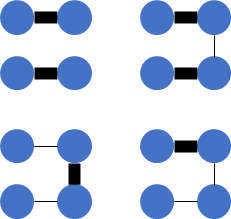

In [4]:
# c909: A-B = 9, B-C = 0, C-D = 9 = 2 clusters, each with 9 internal weight, 0 inter-connections
c909 = csr_matrix([[0,9,0,0],[9,0,0,0],[0,0,0,9],[0,0,9,0]])
c919 = csr_matrix([[0,9,0,0],[9,0,1,0],[0,1,0,9],[0,0,9,0]])
c191 = csr_matrix([[0,1,0,0],[1,0,9,0],[0,9,0,1],[0,0,1,0]])
c911 = csr_matrix([[0,9,0,0],[9,0,1,0],[0,1,0,1],[0,0,1,0]])

In [5]:
def fit(cls, **kwargs):
    algo = cls(**kwargs)
    for adjacency in [c909, c919, c191, c911]:
      print(algo.fit_transform(adjacency))

In [7]:
# Louvain seems to have a reasonable clustering approach
fit(sknetwork.clustering.Louvain)

[0 0 1 1]
[0 0 1 1]
[0 0 0 0]
[0 0 1 1]


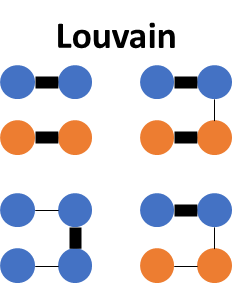

In [ ]:
# Propagation connects everything together
fit(sknetwork.clustering.PropagationClustering)

[0 0 1 1]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]


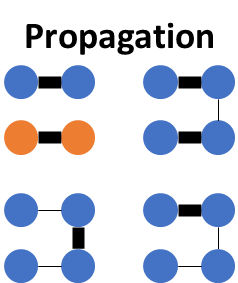

In [ ]:
# KMeans makes no sense
fit(sknetwork.clustering.KMeans, n_clusters=2)

[0 1 0 0]
[0 0 1 0]
[1 0 1 0]
[0 1 0 1]


/usr/local/lib/python3.7/dist-packages/sknetwork/utils/check.py:288: Warning: The dimension of the embedding cannot exceed 3.Changed accordingly.
  "Changed accordingly.".format(n_min)))


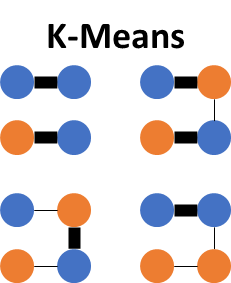

In [ ]:
import sknetwork.hierarchy

In [ ]:
# Strange that c191 does not connect 1-2 first, rest is OK
fit(sknetwork.hierarchy.Paris)

[[1.    0.    0.125 2.   ]
 [3.    2.    0.125 2.   ]
 [5.    4.      inf 4.   ]]
[[1.         0.         0.13157895 2.        ]
 [3.         2.         0.13157895 2.        ]
 [5.         4.         4.74999996 4.        ]]
[[1.         0.         0.22727272 2.        ]
 [3.         2.         0.22727272 2.        ]
 [5.         4.         0.30555556 4.        ]]
[[3.         2.         0.04545455 2.        ]
 [1.         0.         0.22727272 2.        ]
 [4.         5.         1.29545449 4.        ]]


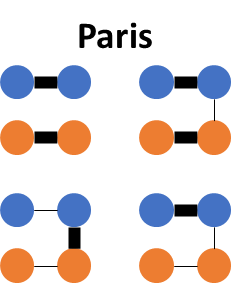

In [ ]:
# Strange that c191 does not connect 1-2 first, rest is OK
fit(sknetwork.hierarchy.LouvainHierarchy)

[[1. 0. 0. 2.]
 [3. 2. 0. 2.]
 [5. 4. 1. 4.]]
[[1. 0. 0. 2.]
 [3. 2. 0. 2.]
 [5. 4. 1. 4.]]
[[3. 2. 0. 2.]
 [4. 1. 0. 3.]
 [5. 0. 0. 4.]]
[[1. 0. 0. 2.]
 [3. 2. 0. 2.]
 [5. 4. 1. 4.]]


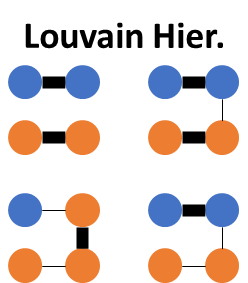

In [ ]:
# Ward makes no sense
fit(sknetwork.hierarchy.Ward)

[[0.         3.         0.83330888 2.        ]
 [1.         2.         1.348789   2.        ]
 [4.         5.         1.63798415 4.        ]]
[[1.         3.         0.66852711 2.        ]
 [0.         2.         1.27510271 2.        ]
 [4.         5.         1.72187044 4.        ]]
[[0.         2.         0.02141568 2.        ]
 [1.         3.         0.33568762 2.        ]
 [4.         5.         1.98461754 4.        ]]
[[0.         2.         0.67167255 2.        ]
 [1.         3.         1.19331088 2.        ]
 [4.         5.         1.6708748  4.        ]]


/usr/local/lib/python3.7/dist-packages/sknetwork/utils/check.py:288: Warning: The dimension of the embedding cannot exceed 3.Changed accordingly.
  "Changed accordingly.".format(n_min)))


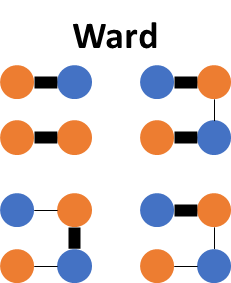

# Download IMDb Data

[IMDb Datasets](https://www.imdb.com/interfaces/) provide dumps of all movie data. We'll download 3 tables:

## name.basics.tsv.gz

**nconst**|**primaryName**|**birthYear**|**deathYear**|**primaryProfession**|**knownForTitles**
:-----:|:-----:|:-----:|:-----:|:-----:|:-----:
nm0000001|Fred Astaire|1899|1987|soundtrack,actor,miscellaneous|tt0031983,tt0072308,tt0053137,tt0050419
nm0000002|Lauren Bacall|1924|2014|actress,soundtrack|tt0071877,tt0037382,tt0038355,tt0117057
nm0000003|Brigitte Bardot|1934|\N|actress,soundtrack,music\_department|tt0054452,tt0049189,tt0056404,tt0057345
nm0000004|John Belushi|1949|1982|actor,soundtrack,writer|tt0080455,tt0078723,tt0072562,tt0077975
nm0000005|Ingmar Bergman|1918|2007|writer,director,actor|tt0050976,tt0050986,tt0060827,tt0083922

## title.basics.tsv.gz

**tconst**|**titleType**|**primaryTitle**|**originalTitle**|**isAdult**|**startYear**|**endYear**|**runtimeMinutes**|**genres**
:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:
tt0000001|short|Carmencita|Carmencita|0|1894|\N|1|Documentary,Short
tt0000002|short|Le clown et ses chiens|Le clown et ses chiens|0|1892|\N|5|Animation,Short
tt0000003|short|Pauvre Pierrot|Pauvre Pierrot|0|1892|\N|4|Animation,Comedy,Romance
tt0000004|short|Un bon bock|Un bon bock|0|1892|\N|12|Animation,Short
tt0000005|short|Blacksmith Scene|Blacksmith Scene|0|1893|\N|1|Comedy,Short

## title.principals.tsv.gz

**tconst**|**ordering**|**nconst**|**category**|**job**|**characters**
:-----:|:-----:|:-----:|:-----:|:-----:|:-----:
tt0000001|1|nm1588970|self|\N|["Self"]
tt0000001|2|nm0005690|director|\N|\N
tt0000001|3|nm0374658|cinematographer|director of photography|\N
tt0000002|1|nm0721526|director|\N|\N
tt0000002|2|nm1335271|composer|\N|\N

In [ ]:
# Download the data
# !rm -f *.tsv.gz
!curl --silent -C - -o name.basics.tsv.gz https://datasets.imdbws.com/name.basics.tsv.gz
!curl --silent -C - -o title.principals.tsv.gz https://datasets.imdbws.com/title.principals.tsv.gz
!curl --silent -C - -o title.basics.tsv.gz https://datasets.imdbws.com/title.basics.tsv.gz
!ls -la *.tsv.gz

-rw-r--r-- 1 root root 223785654 Feb 25 01:50 name.basics.tsv.gz
-rw-r--r-- 1 root root 152683251 Feb 25 01:50 title.basics.tsv.gz
-rw-r--r-- 1 root root 389617886 Feb 25 01:50 title.principals.tsv.gz


In [ ]:
# These gzip files have trailing garbage.
# Python's gzip module does not read GZIP files with trailing garbage.
# Let's create an equivalent of pandas.read_csv() that works around it.
# See https://stackoverflow.com/a/54608126/100904
import zlib
import io
import pandas as pd

def read_csv(path, **kwargs):
    with open(path, 'rb') as handle:
        raw = handle.read()
    stream = io.BytesIO(zlib.decompress(raw, zlib.MAX_WBITS|16))
    return pd.read_csv(stream, **kwargs)

In [ ]:
# Load the movies. 1.4GB RAM. 15s
movies = read_csv('title.basics.tsv.gz', sep='\t', na_values='\\N', dtype={
    'tconst': 'str',
    'titleType': 'str',
    'primaryTitle': 'str',
    'startYear': 'Int64',
}, usecols=['tconst', 'titleType', 'primaryTitle', 'startYear']).set_index('tconst')

In [ ]:
# Only consider movies, not TV series, etc. Shrinks data to ~5%
movies = movies[movies['titleType'] == 'movie']
del movies['titleType']
movies.head()

,primaryTitle,startYear
tconst,,
tt0000502,Bohemios,1905
tt0000574,The Story of the Kelly Gang,1906
tt0000591,The Prodigal Son,1907
tt0000615,Robbery Under Arms,1907
tt0000630,Hamlet,1908


In [ ]:
# Load the cast of each film. 2.0 GB RAM. 30s
cast = read_csv('title.principals.tsv.gz', sep='\t', na_values='\\N', dtype={
    'tconst': 'str',
    'nconst': 'str',
    'category': 'str',
}, usecols=['tconst', 'nconst', 'category'])

In [ ]:
# Only consider actors, not directors, composers, etc. Shrinks data to about 40%
# Only consider actors that have acted in movies, not TV series, etc.
cast = cast[cast.category.isin({'actor', 'actress'}) & cast['tconst'].isin(movies.index)]
cast.head()

,tconst,nconst,category
849,tt0000502,nm0215752,actor
850,tt0000502,nm0252720,actor
1041,tt0000574,nm0846887,actress
1042,tt0000574,nm0846894,actor
1043,tt0000574,nm1431224,actor


In [ ]:
# Load 11m names with birth year. 16s
name = read_csv('name.basics.tsv.gz', sep='\t', na_values='\\N', dtype={
    'nconst': 'str',
    'primaryName': 'str',
    'birthYear': 'Int64'
}, usecols=['nconst', 'primaryName', 'birthYear']).set_index('nconst')

In [ ]:
# Drop those who haven't acted in movies
name = name[name.index.isin(cast['nconst'])]
# name['titles'] has the number of movies they've acted in
name['titles'] = cast['nconst'].value_counts()
name.head()

,primaryName,birthYear,titles
nconst,,,
nm0000001,Fred Astaire,1899,35
nm0000002,Lauren Bacall,1924,37
nm0000003,Brigitte Bardot,1934,35
nm0000004,John Belushi,1949,7
nm0000005,Ingmar Bergman,1918,3


# Which actors act with each other most?

In [ ]:
# First, we need to create an adjacency matrix of actors - movies
# Each row is an movie. Each column is an actor.
# Each cell has 1 if the actor acted in the movie.
# We'll use Pandas' category datatype to do this

p = cast.copy()
p['title'] = p['tconst'].astype('category')
p['name'] = p['nconst'].astype('category')

# Now, we can get a unique index for each title or movie.
# 'row' has the row number, and 'col' has the column number, of each
# cell that should be marked as 1
p['row'] = p['title'].cat.codes.values
p['col'] = p['name'].cat.codes.values
p.head()

,tconst,nconst,category,title,name,row,col
849,tt0000502,nm0215752,actor,tt0000502,nm0215752,0,44228
850,tt0000502,nm0252720,actor,tt0000502,nm0252720,0,50887
1041,tt0000574,nm0846887,actress,tt0000574,nm0846887,1,145853
1042,tt0000574,nm0846894,actor,tt0000574,nm0846894,1,145854
1043,tt0000574,nm1431224,actor,tt0000574,nm1431224,1,296188


In [ ]:
# Now, let's create a sparse matrix out of this.
# Each row is a movie. Each column is an actor.
# If the actor acted in the movie, the cell has 1, else 0.
matrix = csr_matrix((np.ones(len(p), dtype='int'), (p['row'], p['col'])))
matrix[:10, 44200:44210].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
# 'matrix' is an "movie - actor" matrix.
# To convert this into an "actor - actor" matrix, we need to square it.
# Then, each row is an actor. Each column is an actor.
# The cell shows how many movies they acted together in.
square = matrix.T * matrix

# The diagonal has the number of movies a person has acted with themselves.
# Let's set that to zero.
square.setdiag(0)

# Here's what it looks like
square[:10, :10].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 4, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 4, 0, 0, 0, 1, 0, 0, 0, 3],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 3, 0, 0, 0]])

In [ ]:
# Let's create a DataFrame with the number of times 2 actors acted together
# The code is wrapped into the get_pairs() function below.

# (we'll get rid of the spare variables now)
del p, matrix, square

In [ ]:
def get_pairs(min_acted=1, min_pairings=1):
    '''
    Returns an adjacency matrix and actor mapping of actor pairs where:
    - Each actor has acted in at least min_acted films
    - The two actors have acted together in at least min_pairings films
    '''
    top_actors = cast[cast['nconst'].isin(name.index[name['titles'] >= min_acted])]

    # First, we need to create an adjacency matrix of actors - movies
    # Each row is an movie. Each column is an actor.
    # Each cell has 1 if the actor acted in the movie.
    # We'll use Pandas' category datatype to do this
    p = top_actors.copy()
    p['title'] = p['tconst'].astype('category')
    p['name'] = p['nconst'].astype('category')

    # Now, we can get a unique index for each title or movie.
    # 'row' has the row number, and 'col' has the column number, of each
    # cell that should be marked as 1
    p['row'] = p['title'].cat.codes.values
    p['col'] = p['name'].cat.codes.values

    # Now, let's create a sparse matrix out of this.
    # Each row is a movie. Each column is an actor.
    # If the actor acted in the movie, the cell has 1, else 0.
    matrix = csr_matrix((np.ones(len(p), dtype='int'), (p['row'], p['col'])))

    # 'matrix' is an "movie - actor" matrix.
    # To convert this into an "actor - actor" matrix, we need to square it.
    # Then, each row is an actor. Each column is an actor.
    # The cell shows how many movies they acted together in.
    square = matrix.T * matrix

    # The diagonal has the number of movies a person has acted with themselves.
    # Let's set that to zero.
    square.setdiag(0)

    # Let's create a DataFrame with the number of times 2 actors acted together
    cat = name.reindex(p['name'].cat.categories)
    square = square.tocoo()
    pairs = pd.DataFrame({
        'row': cat.index[square.row],
        'col': cat.index[square.col],
        'n': square.data
    })
    pairs = pairs[pairs.n >= min_pairings].reset_index(drop=True)
    return pairs.sort_values('n', ascending=False)

In [ ]:
# See which pairs of actors have acted most together.
pairings = get_pairs()
pairings

,row,col,n
199062,nm0046850,nm0006982,187
381115,nm0006982,nm0046850,187
2194276,nm2082516,nm0648803,146
4330026,nm0648803,nm2082516,146
199051,nm0419653,nm0006982,130
...,...,...,...
2267153,nm0005292,nm0674020,1
2267152,nm0005438,nm0674020,1
2267151,nm0493161,nm0674020,1
2267150,nm0391922,nm0674020,1


In [ ]:
# The IMDb IDs are not that intuitive.
# Let's print the names to make it more meaningful
def lookup(pairs):
    return pd.concat([
        pairs.reset_index(drop=True),
        name.loc[pairs.row].reset_index(drop=True),
        name.loc[pairs.col].reset_index(drop=True),
    ], axis=1).drop(columns=['row', 'col'])

In [ ]:
lookup(pairings)

,n,primaryName,birthYear,titles,primaryName,birthYear,titles
0,187,Bahadur,<NA>,408,Adoor Bhasi,1929,561
1,187,Adoor Bhasi,1929,561,Bahadur,<NA>,408
2,146,Kijaku Ôtani,1878,163,Matsunosuke Onoe,1875,563
3,146,Matsunosuke Onoe,1875,563,Kijaku Ôtani,1878,163
4,130,Jayabharati,<NA>,269,Adoor Bhasi,1929,561
...,...,...,...,...,...,...,...
6393665,1,Erik Palladino,1968,10,Oz Perkins,1974,5
6393666,1,Jeremy Sisto,1974,31,Oz Perkins,1974,5
6393667,1,Bianca Lawson,1979,2,Oz Perkins,1974,5
6393668,1,Lee Holmes,<NA>,3,Oz Perkins,1974,5


These two Indian Malayalam actors [Adoor Bhasi](https://www.imdb.com/name/nm0006982/) and [Bahadur](https://www.imdb.com/name/nm0046850/) appeared together in 187 films.

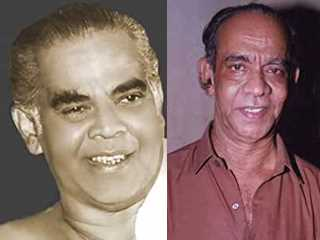

Japanese actors [Kijaku Ôtani](https://www.imdb.com/name/nm2082516/) and [Matsunosuke Onoe](https://www.imdb.com/name/nm0648803/) acted together in 146 films.

# Create the utilities

In [ ]:
# Let's tag actors based on known data points
def tag_actors(**kwargs):
    result = []
    for name, tags in kwargs.items():
        for tag in tags.split(','):
            result.append([name, tag.strip().title()])
    return pd.DataFrame(result, columns=['primaryName', 'tag'])

actor_tags = tag_actors(**{
    'Aachi Manorama': 'Indian, South Indian, Tamil',
    'Aamir Khan': 'Indian, North Indian, Hindi',
    'Adel Emam': 'Egyptian',
    'Ajab Gul': 'Pakistani',
    'Alekos Alexandrakis': 'Greek',
    'Alon Aboutboul': 'Israeli',
    'Ansa Ikonen': 'Finnish, Old',
    'Amitabh Bachchan': 'Indian, North Indian, Hindi',
    'Amr Waked': 'Egyptian',
    'Anjali Devi': 'Indian, South Indian, Telugu, Old',
    'Anny Ondra': 'Czech, Old',
    'Antal Páger': 'Hungarian',
    'Antonio Banderas': 'Spanish, American',
    'Anup Kumar': 'Indian, North Indian, Bengali',
    'Anwar Hossain': 'Bangladeshi, Old',
    'Arifin Shuvo': 'Bangladeshi',
    'Badar Munir': 'Pakistani',
    'Bijay Mohanty': 'Indian, North Indian, Odia',
    'Brad Pitt': 'American',
    'Brahmanandam': 'Indian, South Indian, Telugu',
    'Bourvil': 'French, Old',
    'Burak Özçivit': 'Turkish',
    'Cary Grant': 'American, Old',
    'Charles Chaplin': 'British, Old',
    'Christian Bale': 'British',
    'Christoph Waltz': 'German',
    'Coco Martin': 'Filipino',
    'Daniel Brühl': 'German',
    'Danish Taimoor': 'Pakistani',
    'Delhi Ganesh': 'Indian, South Indian, Tamil',
    'Dinesh Lal Yadav': 'Indian, North Indian, Bhojpuri',
    'Durga Khote': 'Indian, North Indian, Hindi, Old',
    'Edvin Adolphson': 'Swedish, Old',
    'Eugenio Derbez': 'Mexican',
    'Ferdous Ahmed': 'Bangladeshi',
    'Fernanda Montenegro': 'Brazilian',
    'Fernandel': 'French, Old',
    'Frederik Jacobsen': 'Danish, Old',
    'Fritz Kampers': 'German, Old',
    'George Stover': 'Hollywood Horror',
    'Greta Garbo': 'Swedish, American, Old',
    'Hyun Bin': 'South Korean',
    'Ian McKellen': 'British',
    'Ingrid Bergman': 'Swedish, American, Old',
    'Jackson Anthony': 'Sri Lankan',
    'Janusz Gajos': 'Polish',
    'Javier Bardem': 'Spanish, American',
    'Jean Dujardin': 'French',
    'Jerzy Stuhr': 'Polish',
    'Joe DeBartolo': 'Hollywood Horror',
    'John Wayne': 'American, Old',
    'Johnny Walker': 'Indian, North Indian, Hindi, Old',
    'Jürgen Prochnow': 'German',
    'Kabori Sarwar': 'Bangladeshi, Old',
    'Kamal Addaraarachchi': 'Sri Lankan',
    'Katherine Hepburn': 'American, Old',
    'Kento Yamazaki': 'Japanese',
    'Kivanç Tatlitug': 'Turkish',
    'Labros Konstadaras': 'Greek',
    'Lionel Barrymore': 'American, Old',
    'M.G. Ramachandran': 'Indian, South Indian, Tamil, Old',
    'Mahira Khan': 'Pakistani',
    'Mammootty': 'Indian, South Indian, Malayalam',
    'Marcello Mastroianni': 'Italian',
    'Mari Töröcsik': 'Hungarian',
    'Mario Casas': 'Spanish',
    'Mario Maurer': 'Thai',
    'Marki Henderson': 'Hollywood - TV Series',
    'Marwan Kenzari': 'Dutch',
    'Masayoshi Nogami': 'Japanese Porno',
    'Maulik Nayak': 'Indian, Northi Indian, Gujarati',
    'Michael Caine': 'British',
    'Mihir Das': 'Indian, North Indian, Odia',
    'Milena Dravic': 'Yugoslavian',
    'Mohanlal': 'Indian, South Indian, Malayalam',
    'N.T. Rama Rao': 'Indian, South Indian, Telugu, Old',
    'Nagesh': 'Indian, South Indian, Tamil, Old',
    'Nicholas Saputra': 'Indonesian',
    'Odunlade Adekola': 'Nigerian',
    'Olga Engl': 'German, Old',
    'P. Anthony Perea': 'Hollywood - TV Series',
    'Parviz Parastui': 'Iranian',
    'Paul Hörbiger': 'German, Old',
    'Paul T.T. Easter': 'British',
    'Pedro Almodóvar': 'Spanish',
    'Philip Bech': 'Danish, Old',
    'Raghveer Boli': 'Indian, North Indian, Punjabi',
    'Rangeela': 'Pakistani, Old',
    'Reza Rahadian': 'Indonesian',
    'Roberto Benigni': 'Italian',
    'Rodrigo Santoro': 'Brazilian',
    'Ron Jeremy': 'Hollywood Porno',
    'Roni Jonah': 'Hollywood Horror',
    'Sanjay Pandey': 'Indian, North Indian, Bhojpuri',
    'Seiji Nakamitsu': 'Japanese Porno',
    'Senthil': 'Indian, South Indian, Tamil',
    'Shah Rukh Khan': 'Indian, North Indian, Hindi',
    'Shahab Hosseini': 'Iranian',
    'Shivaji Ganesan': 'Indian, South Indian, Tamil, Old',
    'Shivarajkumar': 'Indian, South Indian, Kannada',
    'Siddharth Randeria': 'Indian, North Indian, Gujarati',
    'Soumitra Chatterjee': 'Indian, North Indian, Bengali',
    'Sultan Rahi': 'Pakistani, Old',
    'Swaylee Loughnane': 'British',
    'Takeru Satoh': 'Japanese',
    'Tauno Palo': 'Finnish, Old',
    'Theodor Pistek': 'Czech, Old',
    'Tom Byron': 'Hollywood Porno',
    'Tom Hanks': 'American',
    'Tony Lee Gratz': 'Hollywood Horror',
    'Toyin Abraham': 'Nigerian',
    'Velimir \'Bata\' Zivojinovic': 'Yugoslavian',
    'Vijay Chavan': 'Indian, North Indian, Marathi',
    'Vincent Cassel': 'French',
    'Vladimir Mashkov': 'Russian',
    'Wagner Moura': 'Brazilian',
    'Will Smith': 'American',
    'Xian Li': 'Chinese',
    'Yang Yang': 'Chinese',
    'Yibo Wang': 'Chinese',
    'Yograj Singh': 'Indian, North Indian, Punjabi',
    'Yuri Kolokolnikov': 'Russian',
    'Zhan Xiao': 'Chinese',
})
actor_tags.head()

,primaryName,tag
0,Aachi Manorama,Indian
1,Aachi Manorama,South Indian
2,Aachi Manorama,Tamil
3,Aamir Khan,Indian
4,Aamir Khan,North Indian


In [ ]:
# Store all clusters, subclusters, models & submodels here
subclusters, models, metrics = {}, {}, {}

In [ ]:
def _cluster(pairs, **kwargs):
    '''
    Raw clustering function for internal use.
    '''
    # CREATE THE CLUSTERS
    # -------------------
    # Create a copy of the pairs dataset -- we will change it
    pairs = pairs.copy().reset_index(drop=True)
    # Convert IMDb IDs into sequential numbers for clustering
    uniq = pairs.row.unique()
    cat = pd.Series(np.arange(len(uniq)), index=uniq)
    # Create the adjacency matrix
    adjacency = sknetwork.utils.edgelist2adjacency(pd.DataFrame({
        'row': cat[pairs.row].reset_index(drop=True),
        'col': cat[pairs.col].reset_index(drop=True),
        'n': pairs['n'],
    }))
    
    # Cluster network using Louvain
    model = sknetwork.clustering.Louvain(random_state=1, **kwargs)
    labels = model.fit_transform(adjacency)
    metrics = sknetwork.clustering.modularity(adjacency, labels, return_all=True)
    # cluster is the output DataFrame. Start with the "name" DataFrame copy.
    # It already has nconst (index), primaryName, birthYear, titles
    cluster = name.loc[cat.index].copy()
    # Add the "cluster" column -- which cluster do they belong to
    cluster['cluster'] = pd.Series(labels, index=cat.index)

    # NAME THE CLUSTERS
    # -----------------
    # Show all tags at least 10% of actors have.
    # If 50% of actors have a tag, capitalize it.
    def top_tags(group, min=0.1, caps=0.5):
        freq = group['tag'].value_counts() / group['primaryName'].nunique()
        tags = []
        # TODO: Sort and pick the most specific tag, i.e. last in the hierarchy
        for tag_name, tag_freq in freq.sort_values(ascending=False).items():
            if tag_freq < min:
                break
            tags.append(tag_name.upper() if tag_freq > caps else tag_name)
        return ', '.join(tags)

    # Ignore any actor without a birth year. It's a crude way of de-duplicating for the merge
    # For each actor with a tag, merge on the cluster to get all tags
    join = actor_tags.merge(cluster, on='primaryName')
    # The name of the cluster is the top tags of the people in the cluster
    cluster_names = join.groupby('cluster').apply(top_tags)
    # Add the "clusterName" column by replacing cluster ID from "cluster" column
    cluster['clusterName'] = cluster['cluster'].replace(cluster_names) if len(cluster_names) else cluster['cluster']

    # ADD CLUSTER METRICS
    # -------------------
    # Explore pairings across clusters
    pairs['rowcluster'] = cluster.loc[pairs.row].cluster.reset_index(drop=True)
    pairs['colcluster'] = cluster.loc[pairs.col].cluster.reset_index(drop=True)
    pairs['incluster'] = pairs['n']
    pairs['incluster'] = pairs['n']
    pairs['incluster'].where(pairs['rowcluster'] == pairs['colcluster'], 0, inplace=True)
    groups = pairs.groupby('row')
    # costars: number of unique costars they've acted with
    cluster['costars'] = groups['col'].nunique()
    # coclusters: how many clusters do their costars belong to
    cluster['coclusters'] = groups['colcluster'].nunique()
    # pairings: how many co-starrings (actor-film combinations)
    cluster['pairings'] = groups['n'].sum()
    # incluster: % of pairings with actor in same cluster
    cluster['incluster'] = groups['incluster'].sum()
    cluster['incluster%'] = cluster['incluster'] / cluster['pairings']
    return cluster, model, metrics

In [ ]:
# _path('Brad Pitt', 'Nicolas Cage') returns the path to cluster
# (Brad Pitt's cluster, Nicolas Cage's cluster within Brad Pitt's cluster)
# All of the below are identical
# _path(0, 0)
# _path('Brad Pitt', 0)
# _path(0, 'Nicolas Cage')
# _path('Brad Pitt', 'Nicolas Cage')
def _path(*actors):
    path = []
    for index in range(len(actors)):
        cluster = subcluster(*path[:index])
        id = get_actor(actors[index], *path[:index]).cluster if type(actors[index]) is str else actors[index]
        path.append(id)
    return tuple(path)

In [ ]:
def subcluster(*path):
    '''
    For a cluster path, returns clustered dataset with cluster labels, & more.

    - subcluster[()] returns the root cluster.
    - subcluster[(3, )] subclusters the root cluster and returns cluster #3
    - subcluster[(3, 4)] returns cluster #4 under cluster #3, etc.

    Clusters are cached.
    '''
    path = _path(*path)
    if path in subclusters:
        return subclusters[path]
    # Return root cluster
    if len(path) == 0:
        subclusters[path], models[path], metrics[path] = _cluster(pairings)
        return subclusters[path]
    # Create parent cluster if required
    if path[:-1] not in subclusters:
        subcluster(path[:-1])
    # Create current subcluster
    parent, index = subclusters[path[:-1]], path[-1]
    indices = parent[parent['cluster'] == index].index
    subset = pairings[pairings.row.isin(indices) & pairings.col.isin(indices)]
    subclusters[path], models[path], metrics[path] = _cluster(subset)
    return subclusters[path]

In [ ]:
# subcluster() returns a DataFrame with:
# nconst (index): IMDb ID of the actor. https://www.imdb.com/name/<nconst>/ points to actor
# primaryName: Name of the actor
# birthYear: Year of birth, if available
# titles: Number of titles the actor has acted in
# cluster: Cluster ID the actor belongs to
# clusterName: Name of the cluster ID based on most popular actor_tags
# costars: How many other actors do they act with?
# coclusters: How many other clusters do they act with?
# pairings: How many co-starrings (pairings) have do the have?
# incluster: How many of these pairings are within their cluster?
# incluster%: % of pairings within their cluster (incluster / pairings)

subcluster()

,primaryName,birthYear,titles,cluster,clusterName,costars,coclusters,pairings,incluster,incluster%
nm0046850,Bahadur,<NA>,408,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",283,2,1634,1630,0.997552
nm0006982,Adoor Bhasi,1929,561,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",308,3,2282,2270,0.994741
nm2082516,Kijaku Ôtani,1878,163,7,JAPANESE,92,1,945,945,1.000000
nm0648803,Matsunosuke Onoe,1875,563,7,JAPANESE,95,1,1110,1110,1.000000
nm0419653,Jayabharati,<NA>,269,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",243,3,1123,1120,0.997329
...,...,...,...,...,...,...,...,...,...,...
nm0674265,Yael Perlov,1959,1,3,"FRENCH, Old, Israeli",3,1,3,3,1.000000
nm0674261,David Perlov,1930,1,3,"FRENCH, Old, Israeli",3,1,3,3,1.000000
nm7200934,Louise Faulkner,<NA>,1,11,"BRITISH, Indian, North Indian, Hindi, Old",1,1,1,1,1.000000
nm11771610,Ralph Lowe,<NA>,1,1448,1448,1,1,1,1,1.000000


In [ ]:
def list_(method, *path, count=30, **kwargs):
    '''Base method to list cluster information'''
    path = _path(*path)
    cluster = subcluster(*path)
    top_clusters = cluster['clusterName'].value_counts()
    groups = {k: v for k, v in cluster.groupby('clusterName')}
    for clusterName, count in top_clusters.head(count).iteritems():
        group = groups[clusterName]
        print(f'{group["cluster"].iloc[0]} {clusterName} ({count:,d} actors):',
              method(group=group, **kwargs))

def list_clusters(*path, count=30, names=10):
    path = _path(*path)
    top_actors = lambda group, names: ', '.join(group.sort_values('titles', ascending=False).head(names)['primaryName'].values)
    return list_(top_actors, *path, count=count, names=names)

In [ ]:
# Returns a list of clusters with the total actors and the top actors by title
list_clusters(count=5, names=5)

0 American, British, Spanish, German (81,402 actors): Eric Roberts, Michael Madsen, Tom Sizemore, Danny Trejo, Joe Estevez
1 SPANISH, Mexican (29,716 actors): Mario Almada, Luis Aguilar, Eric del Castillo, Fernando Fernán Gómez, Joaquín Cordero
2 OLD, AMERICAN, Swedish, British (26,949 actors): Raymond Hatton, Charles Starrett, Johnny Mack Brown, Jack Holt, Noah Beery
3 FRENCH, Old, Israeli (25,713 actors): Gérard Depardieu, Charles Vanel, Michel Piccoli, Fernandel, Pierre Brasseur
4 GERMAN, Old, Hungarian (21,692 actors): Olga Engl, Paul Hörbiger, Fritz Kampers, Wilhelm Diegelmann, Georg Alexander


In [ ]:
def get_metrics(*path):
    '''Returns modularity, fit, diversity of a cluster'''
    path = _path(*path)
    subcluster(*path)
    m = metrics[path]
    print(f'Modularity: {m[0]:.1%}. Fit: {m[1]:.1%}. Diversity: {m[2]:.1%}')

In [ ]:
# Modularity = % links within cluster vs if actors paired randomly.
# Fit = % links within cluster
# Diversity = % of random pairings
# Modularity = Fit - Diversity
get_metrics()

Modularity: 90.8%. Fit: 94.9%. Diversity: 4.1%


In [ ]:
# Get actor info in a cluster
def get_actor(actor_name, *path):
    '''Get all information about an actor in a cluster'''
    path = _path(*path)
    cluster = subcluster(*path)
    return cluster[cluster['primaryName'] == actor_name].iloc[0]

In [ ]:
get_actor('Jackie Chan')

primaryName    Jackie Chan
birthYear             1954
titles                  90
cluster                  5
clusterName        CHINESE
costars                224
coclusters               9
pairings               271
incluster              197
incluster%        0.726937
Name: nm0000329, dtype: object

# Worldwide actor clusters

Let's look at the cluster of actors for all films.

In [ ]:
# Here are top 30 worldwide clusters with the 10 actors with most titles
list_clusters(count=30, names=10)

0 American, British, Spanish, German (81,402 actors): Eric Roberts, Michael Madsen, Tom Sizemore, Danny Trejo, Joe Estevez, John Savage, Michael Paré, Tony Devon, Vernon Wells, Malcolm McDowell
1 SPANISH, Mexican (29,716 actors): Mario Almada, Luis Aguilar, Eric del Castillo, Fernando Fernán Gómez, Joaquín Cordero, Ana Luisa Peluffo, Roberto 'Flaco' Guzmán, José Luis López Vázquez, Armando Silvestre, Francisco Rabal
2 OLD, AMERICAN, Swedish, British (26,949 actors): Raymond Hatton, Charles Starrett, Johnny Mack Brown, Jack Holt, Noah Beery, Buck Jones, Bob Steele, John Wayne, Lewis Stone, Lionel Barrymore
3 FRENCH, Old, Israeli (25,713 actors): Gérard Depardieu, Charles Vanel, Michel Piccoli, Fernandel, Pierre Brasseur, Catherine Deneuve, Bernard Blier, Michel Galabru, Isabelle Huppert, Jean-Louis Trintignant
4 GERMAN, Old, Hungarian (21,692 actors): Olga Engl, Paul Hörbiger, Fritz Kampers, Wilhelm Diegelmann, Georg Alexander, Erich Kaiser-Titz, Harry Liedtke, Hans Albers, Frida Richar

# Which are the most insular / liberal clusters?

---



In [ ]:
def list_collaborations(*path, count=30, names=10):
    path = _path(*path)
    # Which clusters do clusters collaborate with?
    if path not in models:
        subcluster(*path)
    cluster, model = subclusters[path], models[path]
    stats = cluster.groupby('cluster').agg({'clusterName': 'first', 'primaryName': 'count'})
    # For the top count clusters
    for index in range(count):
        # model.aggregate_ is a matrix that has the number of collaborations between 2 clusters
        # Get the count of pairings of this clusteer with other clusters
        inter = pd.DataFrame(model.aggregate_[index].todense()).iloc[0]
        # There are "total" pairings in this cluster
        total = inter.sum()
        print(index, stats['clusterName'][index], stats['primaryName'][index], 'actors', end=': ')
        # Sort the clusters by pairings (The first will always be this cluster, since every cluster acts with itself most)
        for pair, count in inter.sort_values(ascending=False).head(names).iteritems():
            # Print cluster name and % of pairings with that cluster
            print(stats['clusterName'][pair] if pair != index else '', f'({count / total:.1%})', end='. ')
        print('')

list_collaborations()

0 American, British, Spanish, German 81402 actors:  (89.6%). OLD, AMERICAN, Swedish, British (2.3%). FRENCH, Old, Israeli (0.8%). BRITISH, Indian, North Indian, Hindi, Old (0.6%). SPANISH, Mexican (0.5%). ITALIAN (0.3%). GERMAN, Old, Hungarian (0.3%). HOLLYWOOD HORROR (0.2%). CHINESE (0.2%). OLD, DANISH, Swedish (0.2%). 
1 SPANISH, Mexican 29716 actors:  (95.5%). ITALIAN (1.0%). American, British, Spanish, German (0.9%). FRENCH, Old, Israeli (0.7%). OLD, AMERICAN, Swedish, British (0.6%). BRAZILIAN (0.3%). GERMAN, Old, Hungarian (0.2%). 46 (0.1%). 29 (0.1%). OLD, DANISH, Swedish (0.0%). 
2 OLD, AMERICAN, Swedish, British 26949 actors:  (94.1%). American, British, Spanish, German (2.6%). ITALIAN (0.7%). GERMAN, Old, Hungarian (0.6%). FRENCH, Old, Israeli (0.6%). SPANISH, Mexican (0.4%). HOLLYWOOD PORNO (0.1%). OLD, DANISH, Swedish (0.1%). 60 (0.1%). JAPANESE (0.1%). 
3 FRENCH, Old, Israeli 25713 actors:  (89.6%). ITALIAN (2.4%). American, British, Spanish, German (2.0%). GERMAN, Old, Hu

# How do they collaborate with each other?

Used for blog post: [How isolated is Bollywood from World Cinema](https://www.s-anand.net/blog/how-isolated-is-bollywood-from-world-cinema/).

TODO: Convert this automatically into `cluster_collaboration.json`.

In [ ]:
def list_collaboration_matrix(*path, count=30):
    path = _path(*path)
    # Which clusters do clusters collaborate with?
    if path not in models:
        subcluster(*path)
    model = models[path]
    # model.aggregate is a matrix that has the number of collaborations between 2 clusters
    interrelation = model.aggregate_[:count]
    return pd.DataFrame((interrelation / interrelation.sum(axis=1))[:count, :count])

list_collaboration_matrix(count=10)

,0,1,2,3,4,5,6,7,8,9
0,0.895526,0.004680,0.022570,0.007610,0.002831,0.001980,0.001407,0.001479,0.000940,0.003197
1,0.009223,0.955072,0.006007,0.006779,0.001775,0.000168,0.000150,0.000161,0.000303,0.010122
2,0.026138,0.003530,0.941236,0.006166,0.006321,0.000378,0.000091,0.000618,0.000129,0.007097
3,0.020127,0.009099,0.014083,0.896059,0.015018,0.000661,0.000136,0.000410,0.002483,0.023675
4,0.007013,0.002231,0.013522,0.014066,0.928461,0.000241,0.000121,0.000248,0.002264,0.010890
5,0.004350,0.000188,0.000716,0.000549,0.000214,0.981991,0.000139,0.003044,0.000081,0.000341
6,0.002429,0.000132,0.000136,0.000089,0.000084,0.000109,0.960195,0.000036,0.000073,0.000089
7,0.002712,0.000149,0.000979,0.000284,0.000183,0.002541,0.000039,0.974801,0.000089,0.000147
8,0.004212,0.000689,0.000501,0.004206,0.004094,0.000165,0.000188,0.000218,0.976586,0.000795
9,0.011528,0.018522,0.022098,0.032279,0.015852,0.000560,0.000185,0.000289,0.000640,0.881323


# Top costars of actors

In [ ]:
def list_costars(actor, *path, names=10, id=False, min_costar=1):
    path = _path(*path)
    cluster = subcluster(*path)
    actor_id = name[name['primaryName'] == actor].index[0]
    titles = pairings[pairings['row'] == actor_id]
    costars = cluster.loc[titles['col']].copy()
    costars['n'] = titles.set_index('col')['n']
    cluster_names = cluster.groupby('cluster')['clusterName'].first()
    for cluster_index, count in costars.groupby('cluster')['n'].sum().sort_values(ascending=False).iteritems():
        cocluster = costars[costars['cluster'] == cluster_index].sort_values('n', ascending=False)
        cocluster = cocluster[cocluster['n'] >= min_costar]
        label = cluster_names[cluster_index]
        if id:
            print(f'{label} ({int(count)}):', ', '.join([f'{row.primaryName} ({row.name} {row.n})' for index, row in cocluster[:names].iterrows()]))
        else:
            print(f'{label} ({int(count)}):', ', '.join([f'{row.primaryName} ({row.n})' for index, row in cocluster[:names].iterrows()]))

In [ ]:
# Which cluster do popular actors' costars belong to?
list_costars('Will Smith', names=10)

American, British, Spanish, German (96): Kenneth Branagh (1), Robert De Niro (1), Whoopi Goldberg (1), Jeff Goldblum (1), Salma Hayek (1), Tommy Lee Jones (3), Kevin Kline (1), Charlize Theron (2), Renée Zellweger (1), Alec Baldwin (1)
SPANISH, Mexican (1): Jordi Mollà (1)
HOLLYWOOD HORROR (1): Lex Elle (1)


In [ ]:
# Robin Williams never acted with any actor thrice. Acted twice only with 2 actors
list_costars('Robin Williams', names=10)

American, British, Spanish, German (123): Pierce Brosnan (1), Robert De Niro (1), David Duchovny (1), Ethan Hawke (1), Dustin Hoffman (1), Nastassja Kinski (1), Diane Lane (1), Jennifer Lopez (1), Ewan McGregor (1), Al Pacino (1)
OLD, AMERICAN, Swedish, British (6): Walter Matthau (1), Dick Van Dyke (1), Ray Walston (1), Ruth Nelson (1), Jerry Reed (1), James Wainwright (1)
JAPANESE (3): Jonathan Freeman (1), Linda Larkin (1), Scott Weinger (1)
SPANISH, Mexican (2): Alejandro Rey (1), Roberto Aguire (1)
GERMAN, Old, Hungarian (1): Éva Igó (1)
OLD, DANISH, Swedish (1): Max von Sydow (1)
THAI (1): Chintara Sukapatana (1)
469 (1): JoJo (1)


In [ ]:
# TODO: Why is Lev Gorn not here?
list_costars('Kamal Haasan')

INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Malayalam (764): Sridevi (23), Sailaja S.P. (1), Kaikala Satyanarayana (2), Ilaiyaraaja (1), Girija (2), Narayana P.L. (2), Adoor Bhasi (6), Suhasini (2), Aamani (1), Abbas (1)
INDIAN, NORTH INDIAN, Hindi, Old, Bengali, Bhojpuri, Gujarati, Punjabi, Marathi (87): Amitabh Bachchan (2), Shekhar Kapur (1), Gulshan Grover (1), Dharmendra (1), Hema Malini (3), Tabu (1), Shakti Kapoor (1), Urmila Matondkar (2), Rati Agnihotri (5), Zeenat Aman (1)
American, British, Spanish, German (1): Miles Anderson (1)
GERMAN, Old, Hungarian (1): B.J. Britt (1)
PAKISTANI, INDIAN, NORTH INDIAN, ODIA, Old, Bangladeshi (1): Bindiya (1)
50 (1): Sunil Thapa (1)


In [ ]:
list_costars('Sophia Loren')

ITALIAN (79): Marcello Mastroianni (11), Vittorio De Sica (6), Anita Ekberg (1), Vittorio Gassman (1), Galina Andreeva (1), Steve Barclay (1), Maria Fiore (1), Rossano Brazzi (1), Pierre Brice (1), Eleonora Brown (1)
OLD, AMERICAN, Swedish, British (70): Marlon Brando (1), Richard Burton (1), Clark Gable (1), Cary Grant (2), Alec Guinness (1), Charlton Heston (1), William Holden (1), Alan Ladd (1), James Mason (1), Paul Newman (1)
FRENCH, Old, Israeli (22): Jean-Paul Belmondo (1), Jean-Pierre Aumont (1), Maurice Chevalier (1), Romy Schneider (1), Françoise Berd (1), Julien Bertheau (1), Lise Bourdin (1), Jean-Pierre Cassel (1), Muriel Catalá (1), Marcel Dalio (1)
American, British, Spanish, German (11): Julia Roberts (1), Mira Sorvino (1), Peter O'Toole (1), Pete Postlethwaite (1), Martin Sheen (1), Deborah Kara Unger (1), F. Murray Abraham (1), Ian Bannen (1), William Devane (1), Barbara Pilavin (1)
SPANISH, Mexican (3): Juan Luis Galiardo (1), Fernando Rey (1), Caspar Zafer (1)
GERMA

# Crossover actors

We know that film actors mostly act within their own industry.

- Hollywood actors act with Hollywood actors 90% of the time.
- Chinese actors act with Chinese actors 99% of the time.

If a Hollywood producer wanted to cast a Chinese actor, whom could they pick?

Particularly if they wanted to reach out through their network of co-actors to find one?

In [ ]:
# Who are the big crossover actors from each cluster? Who act across multiple clusters?
def list_crossovers(*path, count=30, names=10, min_titles=30):
    path = _path(*path)
    def _crossovers(group):
        top_crossover = group[group['titles'] > min_titles].sort_values('incluster%').head(names)
        return ', '.join(f'{row.primaryName} ({row["incluster%"]:.0%})' for index, row in top_crossover.iterrows())
    return list_(_crossovers, *path, count=count)

list_crossovers()

0 American, British, Spanish, German (81,402 actors): Asia Argento (33%), Joaquim de Almeida (34%), Stellan Skarsgård (39%), Charlotte Rampling (40%), Udo Kier (42%), Gael García Bernal (42%), Jacqueline Bisset (43%), Ian Bannen (43%), Geneviève Bujold (46%), Michelle Yeoh (46%)
1 SPANISH, Mexican (29,716 actors): Mona Maris (35%), Rossy de Palma (40%), Geraldine Chaplin (40%), Omero Antonutti (44%), Fernando Rey (50%), Fernando Sancho (51%), Jordi Mollà (52%), Conchita Montenegro (54%), Ángela Molina (54%), George Rigaud (55%)
2 OLD, AMERICAN, Swedish, British (26,949 actors): Cynthia Rothrock (28%), Robert Z'Dar (29%), Ben Gazzara (30%), John Phillip Law (36%), David Carradine (38%), Lili Damita (39%), Charles Napier (39%), Karen Black (39%), Elke Sommer (40%), Henry Silva (40%)
3 FRENCH, Old, Israeli (25,713 actors): Jean Seberg (32%), Patrick Bauchau (34%), Mimsy Farmer (34%), Maria de Medeiros (37%), Erich von Stroheim (39%), Maurice Chevalier (39%), Romy Schneider (39%), Irène Ja

In [ ]:
def acts_most_with(path1, path2, count=10, names=10, min_titles=30):
    '''Return actors in cluster path 1 who co-star most with cluster path 2'''
    path1, path2 = _path(*path1), _path(*path2)
    actors = subcluster()
    actors1 = subcluster(*path1)
    actors1 = actors1[actors1['titles'] >= min_titles]
    actors2 = subcluster(*path2)
    costars1 = pairings[pairings['row'].isin(actors1.index)]
    common_pairs = costars1[costars1['col'].isin(actors2.index)].sort_values('n', ascending=False)
    top_pairings = common_pairs.groupby('row')['n'].sum().sort_values(ascending=False).to_frame()
    top_pairings = top_pairings.merge(actors, how='left', left_index=True, right_index=True)
    for index, d in top_pairings.head(count).iterrows():
        print(f"{d['primaryName']}: {d['n']} ({d['n'] / d['pairings']:.0%}). ", end='')
        top_others = common_pairs[common_pairs['row'] == index].groupby('col')['n'].sum().sort_values(ascending=False)
        print(', '.join([f"{name['primaryName'][other_name]} ({other_count})"
          for other_name, other_count in top_others.head(names).iteritems()]))

In [ ]:
def acts_with(path1, path2):
    '''Returns how often cluster path 1 co-stars with cluster path 2'''
    path1, path2 = _path(*path1), _path(*path2)
    actors1 = subcluster(*path1)
    actors2 = subcluster(*path2)
    costars1 = pairings[pairings['row'].isin(actors1.index)]
    common_pairs = costars1['col'].isin(actors2.index).sum()
    return f'{common_pairs} / {len(costars1)} = {common_pairs / len(costars1):.1%}'

In [ ]:
# Which Chinese actor acts most with Hollywood actors?
acts_most_with(('Jackie Chan',), ('Brad Pitt',), min_titles=30, count=15)

Jackie Chan: 53 (20%). Chris Tucker (3), Owen Wilson (2), John Cusack (1), Mark Tandy (1), Michael Donovan (1), Lee Evans (1), Taraji P. Henson (1), Johnny Knoxville (1), Ken Leung (1), John Lone (1)
Joan Chen: 40 (30%). Rutger Hauer (3), John Lone (2), Anne Heche (1), Jack Thompson (1), Bruno Kirby (1), Michelle Krusiec (1), Art Malik (1), Elizabeth Morehead (1), Harold Pruett (1), John Stanton (1)
Jet Li: 32 (23%). Jason Statham (4), Sylvester Stallone (2), Michelle Yeoh (2), Anthony Anderson (1), Peter Doyle (1), Ric Young (1), Isaiah Washington (1), Jerry Trimble (1), John Lone (1), DMX (1)
Pei-Pei Cheng: 24 (12%). Don McKellar (1), Tzi Ma (1), Jolie Chan (1), Roger Yeh (1), Fenton Li (1), Andrew Leung (1), Yi Liu (1), Ludi Lin (1), Matt Whelan (1), Stephen Lin (1)
Chow Yun-Fat: 19 (6%). Michelle Yeoh (2), John Cusack (1), Paul Ben-Victor (1), Michael Rooker (1), Radha Mitchell (1), James Marsters (1), Jaime King (1), Tom Felton (1), Justin Chatwin (1), Seann William Scott (1)
Donn

In [ ]:
list_costars('Michelle Yeoh', id=True, names=20, min_costar=2)

American, British, Spanish, German (59): Sigourney Weaver (nm0000244 3), Stephen Lang (nm0002332 3), Zoe Saldana (nm0757855 3), Henry Golding (nm6525901 2)
CHINESE (58): Chow Yun-Fat (nm0000334 2), Maggie Cheung (nm0001041 5), Jet Li (nm0001472 2), Kent Cheng (nm0155587 2), Hoi Mang (nm0388367 2), Damian Lau (nm0490521 2), Anita Mui (nm0611315 2), Donnie Yen (nm0947447 2), Ziyi Zhang (nm0955471 2)
JAPANESE (4): 
FRENCH, Old, Israeli (2): 
THAI (2): 
OLD, AMERICAN, Swedish, British (1): 
SOUTH KOREAN (1): 


In [ ]:
# Which Hollywood actor acts most with Chinese actors?
acts_most_with(('Brad Pitt',), ('Jackie Chan',))

Michelle Yeoh: 58 (46%). Maggie Cheung (5), Anita Mui (2), Jet Li (2), Chow Yun-Fat (2), Damian Lau (2), Kent Cheng (2), Ziyi Zhang (2), Donnie Yen (2), Hoi Mang (2), Rongguang Yu (1)
Bai Ling: 43 (20%). Chow Yun-Fat (1), He Lei (1), Gregory Wong (1), Singh Hartihan Bitto (1), Weigang Fan (1), Yuanzhi Tang (1), Xiaohua Luo (1), Ping Guan (1), Yanjie Tong (1), Chunxiang Zhang (1)
Steven Seagal: 9 (8%). Joan Chen (1), Darren Shahlavi (1), Mike Tyson (1), Siu-Wong Fan (1), Janicke Askevold (1), Dong-xue Li (1), Li Ai (1), Zijian Wang (1), Bryan Byrne (1)
Tony Devon: 9 (2%). Lung Ti (3), Billy Zane (1), Manuel Poblete (1), Sarah-Anne Fawcett (1), Joe Black (1), Eric Wolfe (1), Colleen Chan (1)
Gary Daniels: 9 (6%). Darren Shahlavi (1), Keith Cooke (1), Sophia Crawford (1), Mark Houghton (1), Moon Lee (1), Carrie Ng (1), Kwong Leung Wong (1), Françoise Yip (1), Yukari Ôshima (1)
Jason Statham: 7 (6%). Jet Li (4), Bingbing Li (2), Shu Qi (1)
Scott Adkins: 7 (7%). Tiger Hu Chen (1), Yi Huang 

In [ ]:
# Which Hollywood actor acts most with Indian actors?
acts_most_with(('Brad Pitt',), ('Amitabh Bachchan',), count=20)

Julian Sands: 4 (3%). Ayesha Dharker (1), Rahul Khanna (1), Sarah Jane Dias (1), Jim Sarbh (1)
Harvey Keitel: 4 (1%). Gulshan Grover (1), Ayush Mahesh Khedekar (1), Neeraj Kabi (1), Palomi Ghosh (1)
Pierce Brosnan: 3 (2%). Shashi Kapoor (1), Saeed Jaffrey (1), Helena Michell (1)
Malcolm McDowell: 3 (1%). Rahul Dev (1), Perizaad Zorabian (1), Christopher Simpson (1)
Brendan Fraser: 3 (2%). Prem Chopra (1), Ronit Roy (1), Abhay Deol (1)
Stephen McHattie: 3 (3%). Anand Parmar (1), Ravi Khanvilkar (1), Rupak Ginn (1)
Christopher Atkins: 3 (2%). Gulshan Grover (1), Michelle Massey (1), Jaysha Patel (1)
David Arquette: 3 (2%). Priyanka Bose (2), Parambrata Chattopadhyay (1)
Corin Nemec: 3 (3%). Sarika Thakur (1), Parzaan Dastur (1), Naseeruddin Shah (1)
Jason Flemyng: 3 (2%). Shabana Azmi (1), Jamie Wilson (1), Sonu Sood (1)
Stellan Skarsgård: 3 (2%). Amjad Khan (1), Om Puri (1), Naseeruddin Shah (1)
Ron Perlman: 3 (1%). Jaaved Jaaferi (1), Hamad Al Omani (1), Yaqoob Abdullah (1)
Steven Berk

In [ ]:
# Which Indian actor acts most with Hollywood?
acts_most_with(('Amitabh Bachchan',), ('Brad Pitt',), count=20)

Om Puri: 31 (6%). Linda Bassett (2), Tim Robbins (1), Gina McKee (1), Aqib Khan (1), Luke Pasqualino (1), Krystal Vee (1), Manish Dayal (1), Lucy Pinder (1), Albert Laveau (1), Monique Gabriela Curnen (1)
Gulshan Grover: 22 (3%). Harvey Keitel (1), Sean Young (1), Yuval David (1), Cullen Moss (1), Robert Merrill (1), Lorna Raver (1), Ed Quinn (1), Michael O'Hagan (1), Nick Moran (1), Alicia Minshew (1)
Saeed Jaffrey: 21 (9%). Roshan Seth (2), Pierce Brosnan (1), Sean Connery (1), Carrie Preston (1), Sophie Okonedo (1), Rik Mayall (1), Laura Kirk (1), Sakina Jaffrey (1), Galit Hershkovitz (1), Richard Graham (1)
Anupam Kher: 20 (3%). Michael Madsen (1), Asia Argento (1), Armie Hammer (1), Nazanin Boniadi (1), Austin Basis (1), Alison Brie (1), Sara Foster (1), Ewen MacIntosh (1), Luan Bexheti (1), Dee Wallace (1)
Priyanka Chopra Jonas: 17 (11%). Claire Danes (1), Zac Efron (1), Lyon Daniels (1), Liam Hemsworth (1), Adam Devine (1), Rebel Wilson (1), Sam Heughan (1), Jim Parsons (1), Ale

In [ ]:
# Which Chinese actor acts most with Bollywood actors?
acts_most_with(('Jackie Chan',), ('Amitabh Bachchan',), count=100)

Chia-Hui Liu: 3 (2%). Mithun Chakraborty (1), Akshay Kumar (1), Deepika Padukone (1)
Jackie Chan: 1 (0%). Disha Patani (1)
Donnie Yen: 1 (1%). Deepika Padukone (1)
Lu Huang: 1 (1%). Seema Biswas (1)


In [ ]:
# Which Bollywood actor acts most with Chinese actors?
acts_most_with(('Amitabh Bachchan',), ('Jackie Chan',))

Deepika Padukone: 5 (5%). Chia-Hui Liu (1), Donnie Yen (1), Jay Chou (1), Zoe Zhang (1), Kris Wu (1)
Seema Biswas: 3 (1%). Lu Huang (1), Sivakumar Palakrishnan (1), Udaya Soundari (1)
Gulshan Grover: 2 (0%). Jose Manuel (1), Michael Brian (1)
Mithun Chakraborty: 1 (0%). Chia-Hui Liu (1)
W.M. Khan: 1 (1%). Cho-cho Lam (1)
Akshay Kumar: 1 (0%). Chia-Hui Liu (1)
Govardhan Asrani: 1 (0%). Kheng Hua Tan (1)
Radhika Apte: 1 (1%). Winston Chao (1)


In [ ]:
# Which South Indian actor acts most with Hollywood actors?
acts_most_with(('Rajinikanth',), ('Brad Pitt',))

Dhanush: 4 (2%). James Cosmo (2), Erin Moriarty (1), Barkhad Abdi (1)
Rajinikanth: 3 (0%). Charlie Brill (1), Anna Nicholas (1), Brett Stimely (1)
Sarath Babu: 3 (0%). Jamie Elman (1), Danielle Hoover (1), Maurizio Rasti (1)
Vineeth: 2 (1%). Steven Berkoff (1), Heather Prete (1)
Sneha: 2 (1%). John Shea (1), Lucas Near-Verbrugghe (1)
H.G. Dattatreya: 2 (1%). Sai Lang (1), Yeshwant (1)
Kovai Sarala: 2 (0%). Nikesh Patel (1), Deborah Domínguez (1)
Mahesh Babu: 2 (1%). Ilez Badurgov (1), Duy Beck (1)
M.S. Bhaskar: 1 (0%). Deborah Domínguez (1)
Anushka Shetty: 1 (1%). Michael Madsen (1)


In [ ]:
# Which South Indian actor acts most with North Indian actors? (19/30, 30/50 = 60% are female. 10% chance of happening by chance, i.e. 90% likely that there's a preference for South Indian women)
acts_most_with(('Rajinikanth',), ('Amitabh Bachchan',), count=50)

Jaya Prada: 295 (39%). Jeetendra (23), Dharmendra (11), Kader Khan (9), Shakti Kapoor (9), Amitabh Bachchan (7), Shatrughan Sinha (7), Rajesh Khanna (6), Sanjay Dutt (6), Pran Sikand (5), Amrish Puri (5)
Sridevi: 191 (26%). Jeetendra (14), Anil Kapoor (10), Anupam Kher (8), Dharmendra (6), Rishi Kapoor (6), Kader Khan (6), Sunny Deol (6), Gulshan Grover (5), Vinod Khanna (5), Rajesh Khanna (5)
Sayaji Shinde: 177 (48%). Makarand Anaspure (6), Ashish Vidyarthi (4), Sonali Kulkarni (3), Nagesh Bhonsle (3), Deepak Shirke (3), Yashpal Sharma (2), Anant Jog (2), Usha Naik (2), Mangesh Desai (2), Milind Shinde (2)
Rajinikanth: 115 (19%). Kader Khan (4), Rakesh Roshan (4), Rati Agnihotri (4), Anita Raj (3), Vinod Khanna (3), Anupam Kher (3), Padmini Kolhapure (2), Govinda (2), Danny Denzongpa (2), Kimi Katkar (2)
Brahmanandam: 112 (4%). Harish (6), Divya Bharti (5), Nagma (4), Ileana D'Cruz (4), Monica Bedi (3), Atul Kulkarni (3), Rohini Hattangadi (3), Shilpa Shetty Kundra (2), Sayali Bhagat 

In [ ]:
# Which North Indian actor acts most with South Indian actors? (25/50 are female)
acts_most_with(('Amitabh Bachchan',), ('Rajinikanth',), count=50)

Ashish Vidyarthi: 200 (54%). Rangayana Raghu (4), Priyamani (4), Sayaji Shinde (4), Nikita Thukral (3), Bhavana (3), Avinash (3), Vivek (3), Sai Kumar (3), Ajay (3), Kota Srinivasa Rao (2)
Rami Reddy: 122 (55%). Sai Kumar (5), Mohammad Ali (3), Devayani (3), Narra Venkateswara Rao (3), Roja (3), Thriller Manju (3), Vani Viswanath (3), Vijayshanti (3), Gundu Hanumantha Rao (3), Shweta Menon (2)
Nagma: 121 (54%). Chiranjeevi (4), Suman (4), Brahmanandam (4), Sarath Kumar (3), Karthik (3), Venkatesh Daggubati (3), Nagarjuna Akkineni (3), Prabhu Deva (2), Goundamani (2), Manivannan (2)
Girish Karnad: 105 (37%). Anant Nag (4), Nagarjuna Akkineni (3), Sudeep (2), Lakshmi (2), H.G. Dattatreya (2), Vijayshanti (2), Raghuvaran (2), Gautami (2), Radhika Kumaraswamy (2), G.V. Swarnamma (2)
Atul Kulkarni: 94 (36%). Tanikella Bharani (3), Brahmanandam (3), Prathap Pothen (2), Bianca Desai (2), Aryan Rajesh (2), Mohanlal (2), Venu Madhav (2), Sai Pallavi (2), Fahadh Faasil (2), Bhagath Baby Manuel (

# Hollywood sub-clusters

In [ ]:
# Create the subcluster of Hollywood
list_clusters('Brad Pitt', count=12)

0 American, British, Spanish, German (12,337 actors): Malcolm McDowell, Peter Coyote, Armand Assante, Michael Caine, Donald Sutherland, Nicolas Cage, Harvey Keitel, Robert De Niro, Udo Kier, Susan Sarandon
1 1 (5,424 actors): Vernon Wells, Bill Oberst Jr., Lance Henriksen, Debbie Rochon, Shawn C. Phillips, Lloyd Kaufman, Natalie Peri, Brinke Stevens, Felissa Rose, Tony Todd
2 2 (5,381 actors): Eric Roberts, Michael Madsen, Tom Sizemore, Danny Trejo, John Savage, Michael Paré, Michael Ironside, Corbin Bernsen, Robert Miano, James Duval
3 3 (3,647 actors): Steven Berkoff, Simon Phillips, Craig Fairbrass, Bruce Payne, Sean Cronin, Jon Campling, Vas Blackwood, John Wells, Adrian Bouchet, Al Snow
4 INDIAN, NORTH INDIAN, HINDI (3,376 actors): Colm Feore, Tantoo Cardinal, Stephen Chang, Katharine Isabelle, Gabrielle Rose, R.H. Thomson, Ashleigh Ball, Brendan Fletcher, Art Hindle, JR Bourne
5 5 (3,237 actors): Brian Krause, Chris Haywood, Colin Friels, John Jarratt, Tony Barry, Wendy Hughes, B

In [ ]:
list_collaborations('Brad Pitt', count=12)

0 American, British, Spanish, German 12337 actors:  (82.0%). 2 (3.6%). 3 (1.4%). INDIAN, NORTH INDIAN, HINDI (1.3%). 5 (1.0%). 6 (0.9%). 1 (0.7%). 7 (0.4%). 10 (0.4%). 11 (0.4%). 
1 1 5424 actors:  (77.6%). 2 (4.0%). American, British, Spanish, German (2.9%). 7 (1.0%). 9 (0.8%). 6 (0.7%). 8 (0.7%). HOLLYWOOD HORROR (0.7%). 3 (0.5%). 12 (0.5%). 
2 2 5381 actors:  (60.4%). American, British, Spanish, German (14.6%). 1 (4.1%). 6 (1.8%). INDIAN, NORTH INDIAN, HINDI (1.3%). 7 (0.9%). 8 (0.8%). 3 (0.8%). 5 (0.6%). HOLLYWOOD HORROR (0.5%). 
3 3 3647 actors:  (80.1%). American, British, Spanish, German (11.5%). 2 (1.6%). 1 (1.1%). 10 (0.8%). 5 (0.4%). 8 (0.3%). INDIAN, NORTH INDIAN, HINDI (0.3%). 6 (0.2%). 11 (0.2%). 
4 INDIAN, NORTH INDIAN, HINDI 3376 actors:  (78.2%). American, British, Spanish, German (11.9%). 2 (3.0%). 1 (0.6%). 6 (0.4%). 3 (0.3%). 5 (0.3%). 16 (0.2%). 7 (0.2%). 20 (0.2%). 
5 5 3237 actors:  (84.4%). American, British, Spanish, German (9.4%). 2 (1.3%). 1 (0.6%). 3 (0.5%). 

# South Indian sub-clusters

In [ ]:
# Cluster South Indian actors. It breaks up by language
list_clusters('Brahmanandam', count=8)

0 INDIAN, SOUTH INDIAN, KANNADA (3,411 actors): T.N. Balakrishna, Avinash, K.S. Ashwath, Anant Nag, Rajkumar, Ramesh Bhat, Sadhu Kokila, Vishnuvardhan, Rangayana Raghu, Doddanna
1 INDIAN, SOUTH INDIAN, TAMIL, Telugu, Old (2,890 actors): Nassar, Goundamani, Sathyaraj, Radhika Sarathkumar, Prabhu, Senthil, Karthik, Delhi Ganesh, Meena, Vadivelu
2 INDIAN, North Indian, Bengali, South Indian, Telugu (2,675 actors): Brahmanandam, Mohammad Ali, Prakash Raj, Tanikella Bharani, Rajendra Prasad, Ramya Krishnan, Kota Srinivasa Rao, Jagapathi Babu, Suman, Raghu Babu
3 INDIAN, SOUTH INDIAN, MALAYALAM (2,226 actors): Adoor Bhasi, Bahadur, Mammootty, Mohanlal, Prem Nazir, Jayabharati, Jagathi Sreekumar, Madhu, Mala Aravindan, Innocent
4 INDIAN, SOUTH INDIAN, OLD, TAMIL, Telugu (1,159 actors): Aachi Manorama, Pandari Bai, Shivaji Ganesan, Nagesh, N.T. Rama Rao, Anjali Devi, Gummadi, Akkineni Nageshwara Rao, Krishna, Sridevi
5 5 (85 actors): Shakeela, Reshma, Sindhu, Nowshad, Sharmily, Sajini, Bhaskar

In [ ]:
list_collaborations('Brahmanandam', count=8)

0 INDIAN, SOUTH INDIAN, KANNADA 3411 actors:  (85.9%). INDIAN, SOUTH INDIAN, OLD, TAMIL, Telugu (4.8%). INDIAN, SOUTH INDIAN, TAMIL, Telugu, Old (3.2%). INDIAN, North Indian, Bengali, South Indian, Telugu (3.2%). INDIAN, SOUTH INDIAN, MALAYALAM (2.3%). 6 (0.1%). 11 (0.0%). 9 (0.0%). 7 (0.0%). 18 (0.0%). 
1 INDIAN, SOUTH INDIAN, TAMIL, Telugu, Old 2890 actors:  (70.3%). INDIAN, SOUTH INDIAN, MALAYALAM (9.3%). INDIAN, SOUTH INDIAN, OLD, TAMIL, Telugu (8.5%). INDIAN, North Indian, Bengali, South Indian, Telugu (8.3%). INDIAN, SOUTH INDIAN, KANNADA (3.1%). 5 (0.1%). 8 (0.0%). 83 (0.0%). 96 (0.0%). 64 (0.0%). 
2 INDIAN, North Indian, Bengali, South Indian, Telugu 2675 actors:  (73.1%). INDIAN, SOUTH INDIAN, TAMIL, Telugu, Old (10.6%). INDIAN, SOUTH INDIAN, OLD, TAMIL, Telugu (7.8%). INDIAN, SOUTH INDIAN, KANNADA (3.9%). INDIAN, SOUTH INDIAN, MALAYALAM (3.8%). 17 (0.0%). 13 (0.0%). 8 (0.0%). 7 (0.0%). 22 (0.0%). 
3 INDIAN, SOUTH INDIAN, MALAYALAM 2226 actors:  (86.8%). INDIAN, SOUTH INDIAN, 

In [ ]:
# Kannada subcluster
list_clusters('Brahmanandam', 'Shivrajkumar', count=8, names=20)

0 0 (957 actors): Sadhu Kokila, Rangayana Raghu, Achyuth Kumar, H.G. Dattatreya, Bullet Prakash, Sharath Lohitashwa, Chikkanna, Tabla Nani, Ganesh, P. Ravi Shankar, Diganth, Pooja Gandhi, Suchendra Prasad, Vijay Raghavendra, Haripriya, Puneeth Rajkumar, Sudha Belawadi, Sanjjanaa Galrani, Sharan, Prajwal Devaraj
1 INDIAN, SOUTH INDIAN, KANNADA (789 actors): Avinash, Anant Nag, Ramesh Bhat, Doddanna, Bank Janardhan, Shivarajkumar, Devaraj, Ramesh Aravind, Mukhyamantri Chandru, Charan Raj, Srinivasa Murthy, Tennis Krishna, V. Ravichandran, Sudeep, Jaggesh, Shobharaj, Vinaya Prasad, Rekha Das, Komal Kumar, Upendra
2 2 (301 actors): T.N. Balakrishna, K.S. Ashwath, Rajkumar, Vishnuvardhan, Leelavathi, Jayanthi, Udaya Kumar, Bharathi, Ambarish, Shankar Nag, Dinesh, Arathi, B.S. Dwarakish, Kalpana, Kalyana Kumar, Srinath, Comedian Guggu, Jai Jagdeesh, Vajramuni, Saritha
3 3 (120 actors): Aravind Bolar, Pruthvee Ambaar, Naveen D. Padil, Lasya Nagaraj, Arjun Kapikad, Archana Jois, Gopalkrishna D

In [ ]:
# Tamil subcluster
list_clusters('Brahmanandam', 'Delhi Ganesh', count=8, names=20)

0 0 (867 actors): Yogi Babu, M.S. Bhaskar, Manobala, Nayanthara, Santhanam, Vijay Sethupathi, Trisha Krishnan, Thambi Ramaiah, Samuthirakani, Motta Rajendran, V. Jayaprakash, Arya, Anjali, Soori, Aadukalam Naren, Hansika Motwani, Aishwarya Rajesh, Jiiva, T.R. Silambarasan, Shamna Kasim
1 INDIAN, SOUTH INDIAN, TAMIL (518 actors): Goundamani, Sathyaraj, Radhika Sarathkumar, Prabhu, Senthil, Karthik, Delhi Ganesh, Vadivelu, Meena, Radha Ravi, Silk Smitha, Kushboo, Nizhalgal Ravi, Venniradai Moorthy, Manivannan, Raghuvaran, Vijayakanth, Sarath Kumar, Arjun Sarja, Janakaraj
2 2 (458 actors): 'Ganja' Karuppu, Kishore Kumar G., Sneha, Karunas, Dhanush, Madhavan, Saranya Ponvannan, Ilavarasu, Mayilsamy, Namitha, Amala Paul, Appukutty, Sonia Agarwal, Daniel Balaji, Shaam, Devadarshini Chetan, Powerstar Srinivasan, Abhinaya, Aravind Akash, Dhansika
3 3 (188 actors): Nassar, Simran, Vikram, Jyotika, Suriya, Arvind Swamy, Jayam Ravi, Archana, Pasupathy, K.S. Ravikumar, Laila, Asin Thottumkal, Bala

In [ ]:
list_collaborations('Brahmanandam', 'Delhi Ganesh', count=8)

0 0 867 actors:  (70.4%). INDIAN, SOUTH INDIAN, TAMIL (10.2%). 2 (8.6%). 3 (3.5%). 6 (1.5%). 5 (1.5%). 4 (1.4%). 8 (0.6%). 7 (0.5%). 9 (0.3%). 
1 INDIAN, SOUTH INDIAN, TAMIL 518 actors:  (79.2%). 0 (7.6%). 2 (5.1%). 3 (4.0%). 4 (1.2%). 5 (0.8%). 7 (0.5%). 6 (0.3%). 10 (0.2%). 9 (0.1%). 
2 2 458 actors:  (51.8%). 0 (21.2%). INDIAN, SOUTH INDIAN, TAMIL (16.8%). 3 (3.4%). 4 (1.9%). 5 (1.5%). 6 (1.1%). 7 (0.5%). 8 (0.5%). 10 (0.3%). 
3 3 188 actors:  (39.3%). INDIAN, SOUTH INDIAN, TAMIL (29.8%). 0 (19.4%). 2 (7.7%). 4 (1.4%). 6 (0.8%). 8 (0.5%). 7 (0.5%). 9 (0.2%). 5 (0.2%). 
4 4 186 actors:  (56.7%). INDIAN, SOUTH INDIAN, TAMIL (16.6%). 0 (14.3%). 2 (7.8%). 3 (2.5%). 6 (0.7%). 5 (0.6%). 7 (0.3%). 9 (0.2%). 10 (0.2%). 
5 5 126 actors:  (51.8%). 0 (21.7%). INDIAN, SOUTH INDIAN, TAMIL (15.8%). 2 (8.6%). 4 (0.8%). 3 (0.5%). 6 (0.4%). 15 (0.1%). 10 (0.1%). 8 (0.1%). 
6 6 122 actors:  (59.9%). 0 (22.2%). INDIAN, SOUTH INDIAN, TAMIL (6.5%). 2 (6.5%). 3 (2.2%). 4 (1.1%). 8 (0.5%). 5 (0.4%). 9 (0.

In [ ]:
# Telugu subcluster
list_clusters('Brahmanandam', 'Brahmanandam', count=8, names=20)

0 INDIAN, SOUTH INDIAN, TELUGU (589 actors): Brahmanandam, Mohammad Ali, Tanikella Bharani, Rajendra Prasad, Ramya Krishnan, Kota Srinivasa Rao, Jagapathi Babu, Raghu Babu, Giri Babu, Annapoorna, Soundarya, Srikanth, Venkatesh Daggubati, Krishna Bhagavan, Chalapathi Rao, V.K. Naresh, Babu Mohan, Rambha, M.S. Narayana, Jeeva
1 INDIAN, NORTH INDIAN, BENGALI (426 actors): Ajay, Naveen Chandra, Rajsekhar Aningi, Darbha Appaji Ambarisha, Mahesh Achanta, Priyadarshi, Srinivas Avasarala, Ravi Prakash, Aadi, Sampoornesh Babu, Tanya Hope, Harsha Chemudu, Ravi Varma, Adith Arun, Satyadev Kancharana, Ajay Ghosh, Chammak Chandra, Manoj Nandam, Rashmi Gautam, Kamal Kamaraju
2 2 (388 actors): Krishna Murali Posani, Vennela Kishore, Regina Cassandra, Ravi Babu, Krishnudu, Dhanraj, Sundeep Kishan, Varun Sandesh, Suman Shetty, Swathi Reddy, Nagineedu, Archana Shastry, Vimala Raman, Lavanya Tripathi, Thagubothu Ramesh, Pragathi, Jhansi, Rahul Ravindran, Madhunandan, Sakshi Chaudhary
3 3 (275 actors): Pr

In [ ]:
# Malayalam subcluster
list_clusters('Brahmanandam', 'Mohanlal', count=8, names=20)

0 0 (1,229 actors): Indrans, Prithviraj Sukumaran, Biju Menon, Kunchacko Boban, Jayasurya, Lal, Asif Ali, Bhavana, Shivaji Guruvayoor, Meera Jasmine, Aju Varghese, Suraj Venjaramoodu, Joju George, Fahadh Faasil, Indrajith Sukumaran, Riyaz Khan, Shine Tom Chacko, Tovino Thomas, Saiju Kurup, Jaffer Idukki
1 INDIAN, SOUTH INDIAN, MALAYALAM (461 actors): Mammootty, Mohanlal, Jagathi Sreekumar, Mala Aravindan, Innocent, Nedumudi Venu, Suresh Gopi, Jayaram, Jagadish, K.P.A.C. Lalitha, Mukesh, Lalu Alex, Rajan P. Dev, Devan, Siddique, Dileep, Urvashi, Kalabhavan Mani, Harisree Asokan, Sreenivasan
2 2 (384 actors): Adoor Bhasi, Bahadur, Prem Nazir, Jayabharati, Madhu, Janardanan, Srividya, Paravoor Bharathan, Ambika, Thikkurisi Sukumaran Nair, Alummoodan, M.G. Soman, Sukumari, Balan K. Nair, Kuthiravattam Pappu, Sukumaran, Anuradha, Nellikode Bhaskaran, Meena, Jayan
3 3 (12 actors): Basil, Divya Prabha, Badri, Krishnakumar, Henna Bella, Arafath, Devadevan, Muhammed Noufal, Jafeena, Shruti, Sha

In [ ]:
# Old Tamil/Telugu subcluster
list_clusters('Brahmanandam', 'Shivaji Ganesan', count=8, names=20)

2 INDIAN, SOUTH INDIAN, TAMIL, OLD (596 actors): Aachi Manorama, Pandari Bai, Shivaji Ganesan, Nagesh, Lakshmi, Kamal Haasan, Jaishankar, M.N. Nambiar, Gemini Ganesan, K.R. Vijaya, Rajinikanth, Saroja Devi B., V.K. Ramasamy, R. Muthuraman, Padmini, M.G. Ramachandran, Sowcar Janaki, Jayalalitha J, Thengai Srinivasan, Major Sundarrajan
0 INDIAN, SOUTH INDIAN, TELUGU, OLD (403 actors): N.T. Rama Rao, Anjali Devi, Gummadi, Akkineni Nageshwara Rao, Krishna, Sridevi, Mohan Babu, Jayasudha, Jaya Prada, Kaikala Satyanarayana, Sharada, Savitri, Chiranjeevi, Chandramohan, S.V. Ranga Rao, Sarath Babu, Sobhan Babu, Vanisri, Kongara Jaggaiah, Chittor V. Nagaiah
3 3 (58 actors): Pushpavalli, Kanchanamala, C. Krishnaveni, Srirama Murthy Addanki, L.V. Prasad, Bezawada Rajarathnam, Tanguturi Suryakumari, Y.V. Rao, Balijepalli Lakshmikanta Kavi, Subba Rao A.V., Balasaraswathi Raavu, Hanumantha Rao Kallakoori, Sundaramma, Banda Kanakalingeshwara Rao, Suryanarayana, Rao C.S.R., Narayanrao, Puvvula Ansuya,

In [ ]:
list_collaborations('Brahmanandam', 'Shivaji Ganesan', count=8)

0 INDIAN, SOUTH INDIAN, TELUGU, OLD 403 actors:  (81.4%). INDIAN, SOUTH INDIAN, TAMIL, OLD (13.1%). INDIAN, SOUTH INDIAN, TAMIL, OLD (4.7%). 3 (0.5%). 4 (0.1%). 7 (0.1%). 8 (0.0%). 9 (0.0%). 6 (0.0%). 11 (0.0%). 
1 INDIAN, SOUTH INDIAN, TAMIL, OLD 327 actors:  (60.2%). INDIAN, SOUTH INDIAN, TAMIL, OLD (26.8%). INDIAN, SOUTH INDIAN, TELUGU, OLD (11.7%). 3 (0.6%). 5 (0.3%). 4 (0.2%). 6 (0.1%). 10 (0.0%). 9 (0.0%). 7 (0.0%). 
2 INDIAN, SOUTH INDIAN, TAMIL, OLD 269 actors:  (71.9%). INDIAN, SOUTH INDIAN, TELUGU, OLD (15.2%). INDIAN, SOUTH INDIAN, TAMIL, OLD (12.5%). 3 (0.1%). 7 (0.1%). 9 (0.1%). 5 (0.1%). 10 (0.0%). 6 (0.0%). 12 (0.0%). 
3 3 58 actors:  (58.6%). INDIAN, SOUTH INDIAN, TELUGU, OLD (23.9%). INDIAN, SOUTH INDIAN, TAMIL, OLD (10.9%). 4 (3.8%). INDIAN, SOUTH INDIAN, TAMIL, OLD (2.8%). 11 (0.0%). 16 (0.0%). 15 (0.0%). 14 (0.0%). 13 (0.0%). 
4 4 25 actors:  (66.0%). INDIAN, SOUTH INDIAN, TELUGU, OLD (13.8%). 3 (10.8%). INDIAN, SOUTH INDIAN, TAMIL, OLD (9.4%). 11 (0.0%). 16 (0.0%).

In [ ]:
# Dig deeper into old Tamil subcluster
list_clusters('Brahmanandam', 'Shivaji Ganesan', 'Rajinikanth', count=4, names=20)

1 INDIAN, SOUTH INDIAN, TAMIL, OLD (125 actors): Pandari Bai, Shivaji Ganesan, Nagesh, M.N. Nambiar, Gemini Ganesan, K.R. Vijaya, Saroja Devi B., V.K. Ramasamy, R. Muthuraman, Sowcar Janaki, Jayalalitha J, Major Sundarrajan, S.A. Ashokan, R.S. Manohar, Cho Ramaswamy, M.R. Radha, V.S. Raghavan, Manjula, K. Balaji, Ravichandran
0 INDIAN, SOUTH INDIAN, TAMIL (124 actors): Aachi Manorama, Lakshmi, Kamal Haasan, Jaishankar, Rajinikanth, Thengai Srinivasan, Vijayakumar, Sivakumar, Sujatha, Srikanth, Y.G. Mahendran, Jayachitra, Sripriya, Jai Ganesh, Latha, Suruli Rajan, Sumithra, Roja Ramani, Jayalakshmi, Venniradai Nirmala
3 3 (18 actors): Gandhimathi, V. Gopalakrishnan, S.V. Ramadoss, Anuradha, K. Kannan, A. Sakunthala, Kallapetti Singaram, Usilai Mani, Rama Prabha, Amjathkumar, Calcutta Viswanathan, Malasia Bhaskar, Thilagam Narayanasaamy, Trichy Soundararajan, Devi Sri, Siyona Sneha, Noel Sanjith, C. Vasantha
4 4 (2 actors): Chitralaya Gopu, Baby Mahalakshmi


In [ ]:
list_collaborations('Brahmanandam', 'Shivaji Ganesan', 'Rajinikanth', count=4)

0 INDIAN, SOUTH INDIAN, TAMIL 124 actors:  (52.3%). INDIAN, SOUTH INDIAN, TAMIL, OLD (29.4%). INDIAN, SOUTH INDIAN, TAMIL, OLD (15.2%). 3 (3.1%). 4 (0.0%). 
1 INDIAN, SOUTH INDIAN, TAMIL, OLD 82 actors:  (50.5%). INDIAN, SOUTH INDIAN, TAMIL (26.1%). INDIAN, SOUTH INDIAN, TAMIL, OLD (20.6%). 3 (2.8%). 4 (0.0%). 
2 INDIAN, SOUTH INDIAN, TAMIL, OLD 43 actors: INDIAN, SOUTH INDIAN, TAMIL, OLD (39.9%).  (31.0%). INDIAN, SOUTH INDIAN, TAMIL (26.2%). 3 (2.9%). 4 (0.0%). 
3 3 18 actors: INDIAN, SOUTH INDIAN, TAMIL, OLD (34.0%). INDIAN, SOUTH INDIAN, TAMIL (33.3%). INDIAN, SOUTH INDIAN, TAMIL, OLD (18.6%).  (14.1%). 4 (0.0%). 


In [ ]:
list_crossovers('Brahmanandam', count=6)

0 INDIAN, SOUTH INDIAN, KANNADA (3,411 actors): Saritha (15%), Sithara (29%), Charan Raj (40%), Prema (49%), Malasri (50%), Bharathi (54%), Haripriya (55%), Jayanthi (58%), Sanjjanaa Galrani (58%), Tiger Prabhakar (59%)
1 INDIAN, SOUTH INDIAN, TAMIL, Telugu, Old (2,890 actors): Silk Smitha (31%), Nadia Moidu (33%), Prathap Pothen (34%), Meena (36%), Radhika Sarathkumar (38%), Charu Haasan (39%), Revathi (39%), Amala Akkineni (42%), Abbas (43%), Seetha (44%)
2 INDIAN, North Indian, Bengali, South Indian, Telugu (2,675 actors): Jayalalitha (31%), Kavitha (32%), Priyamani (35%), Suresh (35%), Rambha (35%), Vani Viswanath (36%), Sai Kumar (37%), Ramya Krishnan (37%), S.P. Balasubrahmanyam (39%), Prakash Raj (39%)
3 INDIAN, SOUTH INDIAN, MALAYALAM (2,226 actors): Meera Jasmine (39%), Riyaz Khan (43%), Srividya (43%), Kaveri (46%), Karan (46%), Geetha (47%), Urvashi (47%), Ambika (48%), Shubha (49%), Rahman (54%)
4 INDIAN, SOUTH INDIAN, OLD, TAMIL, Telugu (1,159 actors): Bhanupriya (31%), Su

# Indian - North

In [ ]:
# Cluster North Indian actors
list_clusters('Amitabh Bachchan', count=8)

0 INDIAN, NORTH INDIAN, HINDI (4,449 actors): Mithun Chakraborty, Shakti Kapoor, Dharmendra, Aruna Irani, Raza Murad, Kiran Kumar, Anupam Kher, Govardhan Asrani, Prem Chopra, Gulshan Grover
1 INDIAN, NORTH INDIAN, MARATHI (3,399 actors): Mohan Joshi, Ramesh Deo, Laxmikant Berde, Vijay Chavan, Milind Gunaji, Jayshree Gadkar, Sudhir Dalvi, Shreeram Lagoo, Ashok Saraf, Usha Naik
2 INDIAN, NORTH INDIAN, BENGALI (3,143 actors): Soumitra Chatterjee, Anup Kumar, Prasenjit Chatterjee, Utpal Dutt, Bhanu Bannerjee, Uttam Kumar, Chhabi Biswas, Anil Chatterjee, Kali Bannerjee, Rituparna Sengupta
3 INDIAN, OLD, NORTH INDIAN, HINDI, South Indian, Telugu (2,302 actors): Ashok Kumar, Helen, Pran Sikand, Jeevan Dhar, Master Bhagwan, Lalita Pawar, Nirupa Roy, Agha, Madan Puri, Om Prakash
4 INDIAN, NORTH INDIAN, PUNJABI (1,375 actors): Mehar Mittal, Satish Kaul, Guggu Gill, Gurpreet Ghuggi, Yograj Singh, Karamjit Anmol, Binnu Dhillon, Mukul Dev, Daljit Kaur, Arpana Choudhary
5 INDIAN, NORTH INDIAN, BHOJP

In [ ]:
list_collaborations('Amitabh Bachchan', count=8)

0 INDIAN, NORTH INDIAN, HINDI 4449 actors:  (78.9%). INDIAN, OLD, NORTH INDIAN, HINDI, South Indian, Telugu (9.3%). INDIAN, NORTH INDIAN, MARATHI (5.0%). INDIAN, NORTH INDIAN, PUNJABI (2.1%). INDIAN, NORTH INDIAN, BENGALI (1.9%). INDIAN, NORTH INDIAN, BHOJPURI (1.0%). INDIAN, GUJARATI, Northi Indian, North Indian (0.4%). 7 (0.1%). 8 (0.1%). 9 (0.1%). 
1 INDIAN, NORTH INDIAN, MARATHI 3399 actors:  (85.6%). INDIAN, NORTH INDIAN, HINDI (8.8%). INDIAN, OLD, NORTH INDIAN, HINDI, South Indian, Telugu (4.0%). INDIAN, NORTH INDIAN, BENGALI (0.3%). INDIAN, NORTH INDIAN, PUNJABI (0.2%). INDIAN, NORTH INDIAN, BHOJPURI (0.2%). INDIAN, GUJARATI, Northi Indian, North Indian (0.1%). 9 (0.1%). 8 (0.0%). 7 (0.0%). 
2 INDIAN, NORTH INDIAN, BENGALI 3143 actors:  (92.6%). INDIAN, OLD, NORTH INDIAN, HINDI, South Indian, Telugu (3.3%). INDIAN, NORTH INDIAN, HINDI (3.3%). INDIAN, NORTH INDIAN, MARATHI (0.3%). INDIAN, NORTH INDIAN, BHOJPURI (0.1%). INDIAN, NORTH INDIAN, PUNJABI (0.1%). INDIAN, GUJARATI, North

In [ ]:
# Cluster Hindi actors
list_clusters('Amitabh Bachchan', 'Shah Rukh Khan', count=4, names=20)

2 INDIAN, NORTH INDIAN, HINDI (2,651 actors): Mithun Chakraborty, Dharmendra, Aruna Irani, Anupam Kher, Govardhan Asrani, Prem Chopra, Gulshan Grover, Jeetendra, Amitabh Bachchan, Ranjeet Bedi, Raj Babbar, Shatrughan Sinha, Jackie Shroff, Rekha, Rajesh Khanna, Jagdeep, Om Puri, Kader Khan, Bindu Desai, Shashi Kapoor
1 1 (902 actors): Shakti Kapoor, Raza Murad, Kiran Kumar, Sadashiv Amrapurkar, Rakesh Bedi, Dinesh Hingoo, Mushtaq Khan, Bharat Kapoor, Rita Bhaduri, Alok Nath, Avtar Gill, Johny Lever, Beena Banerjee, Anil Dhawan, Goga Kapoor, Arun Bakshi, Mohnish Bahl, Reema Lagoo, Ishrat Ali, Upasna Singh
3 3 (532 actors): Birbal, Anil Nagrath, Sapna Sappu, Amit Pachori, Hemant Birje, Rakesh Pandey, Ali Khan, Vinod Tripathi, Poonam Dasgupta, Joginder Shelly, Satnam Kaur, Ramesh Goyal, Shiva Rindani, Deepak Shirke, Mahesh Raaj, Brij Gopal, Amrit Pal, Prithvi, Aman Sagar, Manmauji
5 5 (35 actors): Sunil Pal, Bobby Kumar, Rajkumar Kanojia, Neelu Kohli, Ganesh Acharya, Siraj Mustafa Khan, Mu

In [ ]:
# Dig deeper into mainstream Hindi actors
list_clusters('Amitabh Bachchan', 'Shah Rukh Khan', 'Aamir Khan', count=8, names=20)

0 0 (105 actors): Om Puri, Naseeruddin Shah, Paresh Rawal, Rohini Hattangadi, Urmila Matondkar, Neena Gupta, Pankaj Kapur, Annu Kapoor, Supriya Pathak, Archana Puran Singh, Anang Desai, Salim Ghouse, Deepa Sahi, Priya Gill, Akash Khurana, Manohar Singh, Harman Baweja, Pearl Padamsee, Sanjana Kapoor, Amardeep Jha
1 1 (85 actors): Ayesha Jhulka, Rahul Roy, Mamta Kulkarni, Pooja Bhatt, Sanjay Kapoor, Sharad S. Kapoor, Himani Shivpuri, Deepak Tijori, Pooja Batra, Atul Agnihotri, Rohit Roy, Suparna Anand, Vikas Bhalla, Arman Kohli, Mink Singh, Suchitra Krishnamoorthi, Mohan Bhandari, Pooja Bedi, Karishma Kotak, Shilpa Anand
2 2 (76 actors): Anupam Kher, Satish Kaushik, Pallavi Joshi, Akshay Anand, Jugal Hansraj, Ravi Baswani, Sushmita Mukherjee, Somy Ali, Renuka Shahane, Deven Bhojani, Anjali Jathar, J. Brandon Hill, Darsheel Safary, Keith Stevenson, Navneet Nishan, Jamie Alter, Shaheen, Richa Sharma, Karan Razdan, Bhavana Balsawar
3 INDIAN, NORTH INDIAN, HINDI (67 actors): Jackie Shroff, A

In [ ]:
list_collaborations('Amitabh Bachchan', 'Shah Rukh Khan', 'Aamir Khan', count=8)

0 0 105 actors:  (59.1%). INDIAN, NORTH INDIAN, HINDI (11.5%). 4 (11.5%). 2 (7.5%). 1 (4.8%). 5 (4.1%). 6 (0.6%). 8 (0.5%). 7 (0.3%). 9 (0.0%). 
1 1 85 actors:  (60.4%). 4 (13.8%). INDIAN, NORTH INDIAN, HINDI (12.5%). 0 (8.5%). 2 (3.2%). 6 (0.9%). 5 (0.4%). 8 (0.4%). 7 (0.0%). 9 (0.0%). 
2 2 76 actors:  (55.6%). 4 (13.1%). 0 (12.6%). INDIAN, NORTH INDIAN, HINDI (12.6%). 1 (3.0%). 5 (1.5%). 6 (1.0%). 7 (0.5%). 8 (0.2%). 9 (0.0%). 
3 INDIAN, NORTH INDIAN, HINDI 67 actors:  (48.1%). 4 (22.0%). 0 (11.1%). 2 (7.2%). 1 (6.8%). 5 (2.2%). 6 (1.6%). 8 (0.6%). 9 (0.2%). 7 (0.1%). 
4 4 62 actors:  (56.2%). INDIAN, NORTH INDIAN, HINDI (18.7%). 0 (9.4%). 1 (6.4%). 2 (6.4%). 6 (1.3%). 5 (0.7%). 8 (0.7%). 9 (0.2%). 7 (0.1%). 
5 5 50 actors:  (74.9%). 0 (12.1%). INDIAN, NORTH INDIAN, HINDI (6.8%). 2 (2.7%). 4 (2.7%). 1 (0.6%). 8 (0.3%). 6 (0.0%). 7 (0.0%). 9 (0.0%). 
6 6 22 actors:  (59.0%). INDIAN, NORTH INDIAN, HINDI (13.9%). 4 (13.1%). 0 (4.9%). 2 (4.9%). 1 (4.1%). 5 (0.0%). 7 (0.0%). 8 (0.0%). 9 (

In [ ]:
# Explore modern parallel Bollywood
list_clusters('Amitabh Bachchan', 'Irrfan Khan', 'Nawazuddin Siddiqui', count=8, names=20)

0 0 (249 actors): Ashutosh Rana, Taapsee Pannu, Radhika Apte, Rajkummar Rao, Pankaj Tripathi, Yami Gautam, Kalki Koechlin, Varun Dhawan, Richa Chadha, Ali Fazal, Kiara Advani, Ayushmann Khurrana, Rajeev Khandelwal, Gulshan Devaiah, Kriti Sanon, Nushrratt Bharuccha, Vicky Kaushal, Kartik Aaryan, Bhumi Pednekar, Vidyut Jammwal
1 INDIAN, NORTH INDIAN, HINDI (214 actors): Akshay Kumar, Ajay Devgn, Suniel Shetty, Salman Khan, Tabu, Shah Rukh Khan, Saif Ali Khan, Manoj Bajpayee, Priyanka Chopra Jonas, John Abraham, Kareena Kapoor, Abhishek Bachchan, Rani Mukerji, Bobby Deol, Bipasha Basu, Riteish Deshmukh, Arjun Rampal, Abhinay Raj Singh, Sonali Bendre, Aishwarya Rai Bachchan
2 2 (205 actors): Ashish Vidyarthi, Irrfan Khan, Kay Kay Menon, Adil Hussain, Vinay Pathak, Nandita Das, Konkona Sen Sharma, Saurabh Shukla, Rahul Bose, Neha Dhupia, Tannishtha Chatterjee, Tisca Chopra, Ranvir Shorey, Rajat Kapoor, Prashant Narayanan, Abhay Deol, Manjari Fadnnis, Mallika Sherawat, Priyanka Bose, Arif Za

In [ ]:
list_collaborations('Amitabh Bachchan', 'Irrfan Khan', 'Nawazuddin Siddiqui', count=8)

0 0 249 actors:  (57.3%). INDIAN, NORTH INDIAN, HINDI (14.4%). 2 (7.3%). 3 (4.0%). 4 (3.7%). 5 (2.3%). 8 (2.2%). 6 (1.9%). 13 (1.6%). 9 (1.1%). 
1 INDIAN, NORTH INDIAN, HINDI 214 actors:  (66.0%). 0 (7.3%). 2 (5.3%). 5 (5.2%). 6 (2.9%). 3 (2.7%). 8 (2.6%). 4 (2.0%). 7 (1.4%). 13 (1.2%). 
2 2 205 actors:  (55.1%). INDIAN, NORTH INDIAN, HINDI (11.2%). 0 (7.8%). 4 (4.7%). 5 (4.0%). 3 (3.8%). 6 (3.2%). 8 (2.1%). 7 (2.0%). 9 (1.4%). 
3 3 145 actors:  (51.0%). INDIAN, NORTH INDIAN, HINDI (10.2%). 0 (7.7%). 2 (6.7%). 4 (5.8%). 6 (4.0%). 5 (3.6%). 7 (2.2%). 9 (1.9%). 10 (1.4%). 
4 4 126 actors:  (49.5%). 2 (9.1%). INDIAN, NORTH INDIAN, HINDI (8.3%). 0 (7.6%). 3 (6.3%). 5 (4.1%). 6 (3.4%). 7 (2.4%). 12 (1.4%). 8 (1.4%). 
5 5 101 actors:  (43.3%). INDIAN, NORTH INDIAN, HINDI (21.8%). 2 (7.8%). 0 (4.9%). 4 (4.2%). 3 (4.0%). 6 (3.9%). 8 (3.1%). 7 (1.7%). 10 (1.2%). 
6 6 94 actors:  (45.2%). INDIAN, NORTH INDIAN, HINDI (15.5%). 2 (8.1%). 3 (5.7%). 0 (5.1%). 5 (5.0%). 4 (4.4%). 11 (2.2%). 8 (2.2%). 

# Who acts most with Hindi actors?

In [ ]:
# South Indian actors act with Hindi actors under 3% of the time
acts_with(('Brahmanandam', ), ('Amitabh Bachchan', 'Shah Rukh Khan'))

'6497 / 234091 = 2.8%'

In [ ]:
# Bengali actors act with Hindi actors even more often ~ 4% of the time
acts_with(('Amitabh Bachchan', 'Anup Kumar'), ('Amitabh Bachchan', 'Shah Rukh Khan'))

'2048 / 51891 = 3.9%'

In [ ]:
# Which Bengali actors act most with Hindi actors? Ans: Utpal Dutt, Biswajeet Chatterjee, etc.
acts_most_with(('Amitabh Bachchan',  'Anup Kumar'), ('Amitabh Bachchan', 'Shah Rukh Khan'), min_titles=0)

Utpal Dutt: 170 (25%). Shabana Azmi (9), Amol Palekar (6), Rekha (5), Mithun Chakraborty (5), A.K. Hangal (4), Govardhan Asrani (4), Raj Babbar (3), C.S. Dubey (3), Jeetendra (3), Jagdeep (3)
Biswajeet Chatterjee: 105 (18%). Rekha (4), Dharmendra (4), Shatrughan Sinha (3), Moushumi Chatterjee (2), Rakesh Roshan (2), Sharmila Tagore (2), Dev Malhotra (2), Shehzad Khan (2), Ramesh Goyal (2), Parikshit Sahni (2)
Prasenjit Chatterjee: 66 (7%). Shakti Kapoor (5), Juhi Chawla (2), Shafi Inamdar (2), Moon Moon Sen (2), Rameshwari (2), Vijayata Pandit (2), Rakesh Bedi (2), Beena Banerjee (2), Birbal (1), Riya Sen (1)
Rituparna Sengupta: 65 (14%). Mithun Chakraborty (4), Ronit Roy (4), Rohit Roy (3), Sharad S. Kapoor (3), Chunky Pandey (3), Kay Kay Menon (2), Rahul Bose (2), Divya Dutta (2), Rajat Kapoor (2), Mamta Kulkarni (2)
Priyanshu Chatterjee: 55 (45%). Sandali Sinha (2), Neha Dhupia (2), Konkona Sen Sharma (2), Darshan Kumaar (1), Dia Mirza (1), Anupriya Laxmi Katoch (1), Aarti Gupta (1)

In [ ]:
# Marathi actors act with Hindi actors ~9% of the time
acts_with(('Amitabh Bachchan', 'Vijay Chavan'), ('Amitabh Bachchan', 'Shah Rukh Khan'))

'5291 / 58028 = 9.1%'

In [ ]:
# Which Marathi actors act most with Hindi actors? Ans: Mohan Joshi, Sudhir Dalvi, etc.
acts_most_with(('Amitabh Bachchan',  'Vijay Chavan'), ('Amitabh Bachchan', 'Shah Rukh Khan'), min_titles=0)

Mohan Joshi: 476 (44%). Kiran Kumar (21), Shakti Kapoor (19), Mithun Chakraborty (13), Satnam Kaur (11), Dharmendra (10), Razak Khan (9), Mushtaq Khan (8), Dinesh Hingoo (8), Raza Murad (7), Anil Nagrath (7)
Sudhir Dalvi: 275 (46%). Birbal (7), Sadashiv Amrapurkar (7), Rakesh Bedi (6), Gulshan Grover (5), Raj Kiran (5), Bharat Kapoor (5), Suresh Chatwal (4), Raza Murad (4), Aruna Irani (4), Kalpana Iyer (3)
Shreeram Lagoo: 273 (47%). Mithun Chakraborty (7), Vinod Mehra (6), Jagdeep (5), Jeetendra (5), Dharmendra (5), Urmila Bhatt (5), Amol Palekar (5), C.S. Dubey (4), Prem Chopra (4), Smita Patil (4)
Milind Gunaji: 202 (40%). Shakti Kapoor (5), Dinesh Hingoo (5), Seema Biswas (4), Deepak Shirke (4), Govind Namdeo (4), Mushtaq Khan (4), Ehsan Khan (3), Raza Murad (3), Sadashiv Amrapurkar (3), Adi Irani (3)
Laxmikant Berde: 188 (19%). Aruna Irani (6), Govardhan Asrani (5), Mithun Chakraborty (5), Sadashiv Amrapurkar (5), Mohnish Bahl (4), Prem Chopra (4), Ayesha Jhulka (3), Brij Gopal (3

In [ ]:
# Punjabi actors act with Hindi actors ~15% of the time
acts_with(('Amitabh Bachchan', 'Mehar Mittal'), ('Amitabh Bachchan', 'Shah Rukh Khan'))

'2283 / 14949 = 15.3%'

In [ ]:
# Which Punjabi actors act most with Hindi actors? Ans: Satish Kaul, Mehar Mittal, etc.
acts_most_with(('Amitabh Bachchan', 'Mehar Mittal'), ('Amitabh Bachchan', 'Shah Rukh Khan'))

Satish Kaul: 142 (34%). Raza Murad (16), Kader Khan (7), Tina Ghai (4), Shakti Kapoor (3), Kiran Kumar (3), Rama Vij (3), Rita Bhaduri (3), Birbal (3), Prema Narayan (3), Kanwarjeet Paintal (2)
Mehar Mittal: 123 (23%). Raza Murad (13), Rajni Bala (6), Tina Ghai (6), Aruna Irani (5), Dharmendra (4), Navin Nischol (3), Padmini Kapila (3), Rama Vij (3), Pankaj Berry (2), Anil Dhawan (2)
Arpana Choudhary: 89 (44%). Raza Murad (8), Danny Denzongpa (3), Jalal Agha (3), Vijay Arora (3), Rakesh Pandey (2), Kanwarjeet Paintal (2), Vinod Mehra (2), Kiran Kumar (2), Dinesh Hingoo (2), Rama Vij (2)
Mukul Dev: 62 (42%). Rahul Dev (4), Ashish Vidyarthi (2), Nana Patekar (2), Jimmy Shergill (2), Amitabh Bachchan (1), Dinesh Kaushik (1), Namrata Shirodkar (1), Anupama Verma (1), Malay Chakrabarty (1), Pinky Chinoy (1)
Daljit Kaur: 61 (32%). Deep Dhillon (4), Shashi Puri (4), Tina Ghai (3), Pankaj Dheer (3), Arjun (3), Upasna Singh (2), Amrit Pal (2), Dharmendra (1), Rajni Bala (1), Aashif Sheikh (1)
B

In [ ]:
# Bhojpuri actors act with Hindi actors ~13% of the time
acts_with(('Amitabh Bachchan', 'Dinesh Lal Yadav'), ('Amitabh Bachchan', 'Shah Rukh Khan'))

'1122 / 8254 = 13.6%'

In [ ]:
# Which Bhojpuri actors act most with Hindi actors? Ans: Ravi Kishan, Monalisa
acts_most_with(('Amitabh Bachchan', 'Dinesh Lal Yadav'), ('Amitabh Bachchan', 'Shah Rukh Khan'))

Ravi Kishan: 220 (45%). Raza Murad (7), Nagma (6), Kiran Kumar (6), Upasna Singh (4), Shakti Kapoor (4), Hrishitaa Bhatt (3), Rakhi Sawant (3), Yunus Parvez (3), Bhagyashree Patwardhan (2), Birbal (2)
Monalisa: 43 (27%). Raza Murad (3), Shakti Kapoor (2), Vikas Kalantri (2), Hina Tasleem (2), Jatin Garewal (2), Vishwajeet Pradhan (2), Dharmendra (1), Chahat Khanna (1), Hyder Kazmi (1), Tarun Arora (1)
Rani Chatterjee: 14 (13%). Raza Murad (2), Shakti Kapoor (1), Sadashiv Amrapurkar (1), Shahbaaz Khan (1), Johny Lever (1), Nagma (1), Surendra Pal (1), Ranjeet Bedi (1), Tinnu Verma (1), Ketki Dave (1)
Awdhesh Mishra: 13 (7%). Raza Murad (2), Upasna Singh (2), Amitabh Bachchan (1), Gulshan Grover (1), Shakti Kapoor (1), Jaya Bachchan (1), Prem Chopra (1), Anupam Kher (1), Sapna Sappu (1), Gajendra Chauhan (1)
Pawan Singh: 8 (7%). Dharmendra (1), Rati Agnihotri (1), Kader Khan (1), Shahbaaz Khan (1), Sapna Sappu (1), Rakhi Sawant (1), Sara Loren (1), Shahid Shams (1)
Pradeep Pandey: 8 (7%)

In [ ]:
# Pakistani actors act with Hindi actors <1% of the time
acts_with(('Rangeela', 'Rangeela'), ('Amitabh Bachchan', 'Shah Rukh Khan'))

'123 / 14556 = 0.8%'

In [ ]:
# Which Pakistani actors act most with Hindi actors? Ans: Salma Agha, Shabnam
acts_most_with(('Rangeela', 'Rangeela'), ('Amitabh Bachchan', 'Shah Rukh Khan'))

Salma Agha: 43 (33%). Raj Babbar (5), Birbal (3), Arjun (3), Harbans Darshan M. Arora (2), Brando Bakshi (2), Rakesh Bedi (2), Mithun Chakraborty (2), Firoz Irani (1), Naseeruddin Shah (1), Farooq Shaikh (1)
Shabnam: 21 (6%). Shashi Kapoor (1), Ratna Bhooshan (1), Arun Govil (1), Amit Dhamija (1), Madhumalti Kapoor (1), Meera Madhuri (1), Randhir Singh (1), Shamsuddin (1), Devar (1), Somesh Agarwal (1)
Jawed Sheikh: 7 (3%). Rekha (1), Hema Malini (1), Tom Alter (1), Avtar Gill (1), Om Puri (1), Paresh Rawal (1), Sunil Pal (1)
Deeba Begum: 6 (2%). Juhi Chawla (1), Zeenat Aman (1), Zeba Bakhtiar (1), Divya Dutta (1), Nagma (1), Sushant Singh (1)
Nadeem Baig: 4 (1%). Zeba Bakhtiar (1), Tamanna (1), Somesh Agarwal (1), Sheeba Bhakri (1)
Sultan Rahi: 4 (0%). Chandni (3), Sabeeha (1)
Nanha: 2 (1%). Tamanna (2)
Munawar Zarif: 2 (1%). Sangeeta Naik (1), Sabeeha (1)
Mustafa Qureshi: 2 (0%). Zeba Bakhtiar (2)
Nazar: 1 (0%). Shahina (1)


In [ ]:
# Hindi actors act with Pakistani actors 0.1% of the time
acts_with(('Amitabh Bachchan', 'Shah Rukh Khan'), ('Rangeela', 'Rangeela'))

'123 / 101764 = 0.1%'

In [ ]:
# Which Hindi actors act most with Pakistani actors? Ans: Zeenat Aman, Raj Babbar & other Salma Agha co-stars
acts_most_with(('Amitabh Bachchan', 'Shah Rukh Khan'), ('Rangeela', 'Rangeela'))

Zeenat Aman: 6 (2%). Deeba Begum (1), Firdous (1), Masood Akhtar (1), Nighat (1), Kashif Aslam (1), Alauddin (1)
Raj Babbar: 5 (1%). Salma Agha (5)
Birbal: 3 (0%). Salma Agha (3)
Arjun: 3 (1%). Salma Agha (3)
Mithun Chakraborty: 2 (0%). Salma Agha (2)
Ranjeet Bedi: 2 (0%). Salma Agha (1), Iqbal Hasan (1)
Shashi Kapoor: 2 (0%). Zia Mohyeddin (1), Shabnam (1)
Ramesh Goyal: 2 (1%). Salma Agha (1), Yusuf Khan (1)
Rakesh Bedi: 2 (0%). Salma Agha (2)
Smita Patil: 1 (0%). Salma Agha (1)


In [ ]:
# Manipuri actors act with Hindi actors ~13% of the time
subcluster().loc['nm5869061']

primaryName    Bala Hijam
birthYear            <NA>
titles                  5
cluster                67
clusterName            67
costars                16
coclusters              2
pairings               16
incluster              13
incluster%         0.8125
Name: nm5869061, dtype: object

## Who acts in the most clusters?

In [ ]:
# Who acts most across world clusters? Eric Roberts, Joe Estevez, etc.
subcluster().sort_values('coclusters', ascending=False).query('titles >= 50').head(20)

,primaryName,birthYear,titles,cluster,clusterName,costars,coclusters,pairings,incluster,incluster%
nm0000616,Eric Roberts,1956,297,0,"American, British, Spanish, German",864,52,996,856,0.859438
nm0261724,Joe Estevez,1946,129,0,"American, British, Spanish, German",372,36,436,302,0.692661
nm2454994,Bill Oberst Jr.,1965,101,0,"American, British, Spanish, German",293,30,320,246,0.768750
nm1864017,Maria Olsen,<NA>,72,0,"American, British, Spanish, German",259,29,273,222,0.813187
nm1678610,Theodore Bouloukos,<NA>,54,72,72,187,28,190,105,0.552632
nm0442207,Lloyd Kaufman,1945,91,0,"American, British, Spanish, German",348,28,390,277,0.710256
nm3025400,Shawn C. Phillips,1985,92,0,"American, British, Spanish, German",285,26,392,307,0.783163
nm0001698,John Savage,1949,112,0,"American, British, Spanish, German",327,24,349,275,0.787966
nm0004193,Debbie Rochon,1968,94,0,"American, British, Spanish, German",302,24,368,280,0.760870
nm0001424,Udo Kier,1944,94,0,"American, British, Spanish, German",269,22,279,116,0.415771


In [ ]:
# Who from North Indian films acts most across world clusters? Gulshan Grover, Om Puri, Naseeruddin Shah
subcluster().loc[subcluster('Amitabh Bachchan').index].sort_values('coclusters', ascending=False).query('titles >= 50').head(20)

,primaryName,birthYear,titles,cluster,clusterName,costars,coclusters,pairings,incluster,incluster%
nm0004109,Gulshan Grover,1955,195,6,"INDIAN, NORTH INDIAN, Hindi, Old, Bengali, Bho...",525,12,862,783,0.908353
nm0700875,Om Puri,1950,152,6,"INDIAN, NORTH INDIAN, Hindi, Old, Bengali, Bho...",395,9,529,449,0.848771
nm0787462,Naseeruddin Shah,1950,147,6,"INDIAN, NORTH INDIAN, Hindi, Old, Bengali, Bho...",343,9,501,465,0.928144
nm0222144,Rahul Dev,<NA>,72,6,"INDIAN, NORTH INDIAN, Hindi, Old, Bengali, Bho...",228,8,258,149,0.577519
nm0001934,Kabir Bedi,1946,57,6,"INDIAN, NORTH INDIAN, Hindi, Old, Bengali, Bho...",191,8,221,181,0.819005
nm0084443,Seema Biswas,1965,60,6,"INDIAN, NORTH INDIAN, Hindi, Old, Bengali, Bho...",191,8,217,185,0.852535
nm0051856,Victor Banerjee,1946,82,6,"INDIAN, NORTH INDIAN, Hindi, Old, Bengali, Bho...",234,8,308,280,0.909091
nm0006762,Saeed Jaffrey,1929,56,6,"INDIAN, NORTH INDIAN, Hindi, Old, Bengali, Bho...",194,7,233,198,0.849785
nm0000818,Shabana Azmi,1950,129,6,"INDIAN, NORTH INDIAN, Hindi, Old, Bengali, Bho...",286,7,467,435,0.931478
nm0451321,Shah Rukh Khan,1965,67,6,"INDIAN, NORTH INDIAN, Hindi, Old, Bengali, Bho...",134,6,199,188,0.944724


In [ ]:
# Who from South Indian films acts most across world clusters? Brahmanandam, Dhanush, Sadhu Kokila, Kamal Haasan
subcluster().loc[subcluster('Brahmanandam').index].sort_values('coclusters', ascending=False).query('titles >= 50').head(20)

,primaryName,birthYear,titles,cluster,clusterName,costars,coclusters,pairings,incluster,incluster%
nm0103977,Brahmanandam,1956,798,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",932,9,2712,2585,0.953171
nm1333687,Dhanush,1983,53,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",163,7,193,167,0.865285
nm2794335,Sadhu Kokila,<NA>,162,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",385,7,638,619,0.970219
nm0352032,Kamal Haasan,1954,220,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",368,6,855,764,0.893567
nm1184326,Babu Antony,<NA>,76,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",207,5,336,314,0.934524
nm0793851,Sayaji Shinde,<NA>,92,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",305,5,369,187,0.506775
nm0004437,Sridevi,1963,234,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",276,5,722,528,0.731302
nm0080238,Tanikella Bharani,1954,193,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",409,5,775,732,0.944516
nm0471447,Ramya Krishnan,1970,161,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",351,5,579,530,0.915371
nm0695177,Prakash Raj,1965,246,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",508,5,831,739,0.889290


In [ ]:
# Who from Chinese films acts most across world clusters? Yasuaki Kurata, Lieh Lo, Jackie Chan
subcluster().loc[subcluster('Jackie Chan').index].sort_values('coclusters', ascending=False).query('titles >= 50').head(20)

,primaryName,birthYear,titles,cluster,clusterName,costars,coclusters,pairings,incluster,incluster%
nm0475602,Yasuaki Kurata,1946,57,5,CHINESE,192,10,231,187,0.809524
nm0516316,Lieh Lo,1939,132,5,CHINESE,265,9,475,449,0.945263
nm0000329,Jackie Chan,1954,90,5,CHINESE,224,9,271,197,0.726937
nm0151155,Michael Wai-Man Chan,1946,116,5,CHINESE,377,8,514,499,0.970817
nm0938975,Carter Wong,1947,61,5,CHINESE,180,8,242,217,0.896694
nm0911093,Jimmy Wang Yu,1944,70,5,CHINESE,168,7,261,248,0.950192
nm0151080,Sing Chen,1936,91,5,CHINESE,258,7,370,356,0.962162
nm0939255,Michael Wong,1965,58,5,CHINESE,184,7,222,206,0.927928
nm0960013,Yukari Ôshima,1963,52,5,CHINESE,147,7,199,159,0.798995
nm0514904,Chia-Hui Liu,1951,50,5,CHINESE,144,6,186,164,0.881720


In [ ]:
# Who acts most across North-Indian clusters? Raza Murad, Asrani, Rakesh Bedi, Gulshan Grover, etc.
subcluster('Amitabh Bachchan').sort_values('coclusters', ascending=False).query('titles >= 50').head(20)

,primaryName,birthYear,titles,cluster,clusterName,costars,coclusters,pairings,incluster,incluster%
nm0451272,Mushtaq Khan,<NA>,92,0,"INDIAN, NORTH INDIAN, HINDI",328,18,466,336,0.721030
nm0613417,Raza Murad,1950,240,0,"INDIAN, NORTH INDIAN, HINDI",567,17,1271,971,0.763965
nm2147526,Govardhan Asrani,1941,200,0,"INDIAN, NORTH INDIAN, HINDI",438,15,858,673,0.784382
nm0066075,Rakesh Bedi,1954,131,0,"INDIAN, NORTH INDIAN, HINDI",408,13,639,503,0.787167
nm0004109,Gulshan Grover,1955,195,0,"INDIAN, NORTH INDIAN, HINDI",455,13,783,670,0.855683
nm0592799,Sanjay Mishra,<NA>,59,0,"INDIAN, NORTH INDIAN, HINDI",158,13,179,132,0.737430
nm0787462,Naseeruddin Shah,1950,147,0,"INDIAN, NORTH INDIAN, HINDI",308,12,465,405,0.870968
nm0022758,Tom Alter,1950,86,0,"INDIAN, NORTH INDIAN, HINDI",289,12,346,236,0.682081
nm0700875,Om Puri,1950,152,0,"INDIAN, NORTH INDIAN, HINDI",323,12,449,361,0.804009
nm0084443,Seema Biswas,1965,60,0,"INDIAN, NORTH INDIAN, HINDI",160,12,185,110,0.594595


In [ ]:
# Who acts most across south Indian clusters? Avinash, Sai Kumar, etc
subcluster('Brahmanandam').sort_values('coclusters', ascending=False).query('titles >= 50').head(20)

,primaryName,birthYear,titles,cluster,clusterName,costars,coclusters,pairings,incluster,incluster%
nm0043199,Avinash,<NA>,203,0,"INDIAN, SOUTH INDIAN, KANNADA",470,11,758,634,0.836412
nm0474871,Sai Kumar,<NA>,96,2,"INDIAN, North Indian, Bengali, South Indian, T...",247,10,298,110,0.369128
nm0080238,Tanikella Bharani,1954,193,2,"INDIAN, North Indian, Bengali, South Indian, T...",372,9,732,625,0.853825
nm2794335,Sadhu Kokila,<NA>,162,0,"INDIAN, SOUTH INDIAN, KANNADA",367,9,619,557,0.899838
nm1693209,Ramesh Bhat,<NA>,163,0,"INDIAN, SOUTH INDIAN, KANNADA",382,8,659,588,0.892261
nm5724719,Achyuth Kumar,<NA>,93,0,"INDIAN, SOUTH INDIAN, KANNADA",257,8,353,318,0.900850
nm5701208,Sharath Lohitashwa,<NA>,55,0,"INDIAN, SOUTH INDIAN, KANNADA",182,8,224,193,0.861607
nm6489058,Yogi Babu,<NA>,116,1,"INDIAN, SOUTH INDIAN, TAMIL, Telugu, Old",287,8,384,342,0.890625
nm0893449,Nedumudi Venu,1948,205,3,"INDIAN, SOUTH INDIAN, MALAYALAM",316,8,745,664,0.891275
nm0103977,Brahmanandam,1956,798,2,"INDIAN, North Indian, Bengali, South Indian, T...",839,8,2585,1924,0.744294


## Who are the most insular actors in World Cinema?

In [ ]:
# Who are the most insular across world clusters among Hollywood actors? Ben Affleck
subcluster().loc[subcluster('Brad Pitt').index].query('pairings == incluster').sort_values('pairings', ascending=False).head(20)

,primaryName,birthYear,titles,cluster,clusterName,costars,coclusters,pairings,incluster,incluster%
nm0000255,Ben Affleck,1972,48,0,"American, British, Spanish, German",120,1,130,130,1.0
nm0323304,Donald F. Glut,1944,17,0,"American, British, Spanish, German",13,1,107,107,1.0
nm0314775,David Gerrold,1944,17,0,"American, British, Spanish, German",13,1,107,107,1.0
nm4050725,Jason Barker,<NA>,18,0,"American, British, Spanish, German",11,1,95,95,1.0
nm0001305,Lukas Haas,1976,31,0,"American, British, Spanish, German",91,1,93,93,1.0
nm0005188,James Marsden,1973,31,0,"American, British, Spanish, German",88,1,93,93,1.0
nm0241049,Josh Duhamel,1972,33,0,"American, British, Spanish, German",81,1,91,91,1.0
nm0000982,Josh Brolin,1968,30,0,"American, British, Spanish, German",84,1,87,87,1.0
nm0004879,Snoop Dogg,1971,27,0,"American, British, Spanish, German",81,1,85,85,1.0
nm0000337,Rachael Leigh Cook,1979,29,0,"American, British, Spanish, German",84,1,84,84,1.0


In [ ]:
# Who are the most insular across world clusters among Hindi actors? Sapna Sappu, Satnam Kaur, Neetu Singh
subcluster().loc[subcluster('Amitabh Bachchan', 'Shah Rukh Khan').index].query('pairings == incluster').sort_values('pairings', ascending=False).head(20)

,primaryName,birthYear,titles,cluster,clusterName,costars,coclusters,pairings,incluster,incluster%
nm0764598,Sapna Sappu,<NA>,87,6,"INDIAN, NORTH INDIAN, Hindi, Old, Bengali, Bho...",159,1,365,365,1.0
nm2071432,Satnam Kaur,<NA>,53,6,"INDIAN, NORTH INDIAN, Hindi, Old, Bengali, Bho...",100,1,265,265,1.0
nm0802183,Neetu Singh,1958,48,6,"INDIAN, NORTH INDIAN, Hindi, Old, Bengali, Bho...",99,1,187,187,1.0
nm1294392,Shashi Puri,<NA>,25,6,"INDIAN, NORTH INDIAN, Hindi, Old, Bengali, Bho...",117,1,133,133,1.0
nm0154222,Suresh Chatwal,<NA>,29,6,"INDIAN, NORTH INDIAN, Hindi, Old, Bengali, Bho...",116,1,129,129,1.0
nm1031273,Ramesh Mehta,1934,29,6,"INDIAN, NORTH INDIAN, Hindi, Old, Bengali, Bho...",56,1,127,127,1.0
nm0419741,Smita Jaykar,<NA>,27,6,"INDIAN, NORTH INDIAN, Hindi, Old, Bengali, Bho...",112,1,119,119,1.0
nm0318783,Benjamin Gilani,1946,24,6,"INDIAN, NORTH INDIAN, Hindi, Old, Bengali, Bho...",105,1,112,112,1.0
nm2210312,Durgesh Nandini,<NA>,17,6,"INDIAN, NORTH INDIAN, Hindi, Old, Bengali, Bho...",54,1,105,105,1.0
nm1249116,Ranvir Shorey,1972,30,6,"INDIAN, NORTH INDIAN, Hindi, Old, Bengali, Bho...",79,1,100,100,1.0


In [ ]:
# Who are the most insular across world clusters among South Indian actors? 
subcluster().loc[subcluster('Brahmanandam').index].query('pairings == incluster').sort_values('pairings', ascending=False).head(20)

,primaryName,birthYear,titles,cluster,clusterName,costars,coclusters,pairings,incluster,incluster%
nm2133977,Kaduvakkulam Antony,<NA>,94,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",145,1,417,417,1.0
nm1522315,Baiju,<NA>,73,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",176,1,320,320,1.0
nm1314762,Gandhimathi,<NA>,56,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",160,1,315,315,1.0
nm1267637,Ponnamma Babu,<NA>,60,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",150,1,251,251,1.0
nm1459145,Bobby Kottarakkara,<NA>,42,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",138,1,247,247,1.0
nm1135609,Rani Chandra,<NA>,61,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",99,1,245,245,1.0
nm1182244,S.S. Rajendran,1928,44,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",108,1,241,241,1.0
nm0680927,Philomina,1925,45,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",135,1,239,239,1.0
nm3159930,Shivaji Guruvayoor,<NA>,68,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",167,1,237,237,1.0
nm0426958,Johny,<NA>,43,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",135,1,223,223,1.0


In [ ]:
# Who are the most insular across world clusters among Tamil actors? Madhan Bob, Vidharth, KS Ravikumar
subcluster().loc[subcluster('Brahmanandam', 'Delhi Ganesh').index].query('pairings == incluster').sort_values('pairings', ascending=False).head(20)

,primaryName,birthYear,titles,cluster,clusterName,costars,coclusters,pairings,incluster,incluster%
nm1485941,Madhan Bob,<NA>,43,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",165,1,199,199,1.0
nm5180541,Imman Annachi,<NA>,24,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",100,1,106,106,1.0
nm1217876,S. Ve. Sekar,<NA>,19,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",61,1,90,90,1.0
nm2011414,Devadarshini Chetan,<NA>,24,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",83,1,90,90,1.0
nm2465676,Poonam Bajwa,<NA>,21,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",83,1,88,88,1.0
nm0433893,K.S. Ravikumar,<NA>,25,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",71,1,84,84,1.0
nm8038620,Vijay Krishnaraj,<NA>,18,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",67,1,83,83,1.0
nm2670388,Singampuli,<NA>,24,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",72,1,81,81,1.0
nm6897761,Thalapathi Dinesh,<NA>,15,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",72,1,81,81,1.0
nm1719748,Ranjith,<NA>,16,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",65,1,77,77,1.0


In [ ]:
list_costars('Goundamani')

INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Malayalam (825): Senthil (54), Aachi Manorama (34), Sathyaraj (26), Karthik (20), Radha Ravi (14), Kushboo (13), Sarath Kumar (12), S.S. Chandran (10), Prabhu (10), Vijayakanth (10)
INDIAN, NORTH INDIAN, Hindi, Old, Bengali, Bhojpuri, Gujarati, Punjabi, Marathi (17): Salim Ghouse (3), Nagma (2), Rekha Mallick (2), Poonam Dhillon (1), Poonam Dasgupta (1), Girish Karnad (1), Manisha Koirala (1), Vijay Kumar (1), Rati Agnihotri (1), Sonali Bendre (1)
PAKISTANI, INDIAN, NORTH INDIAN, ODIA, Old, Bangladeshi (2): Rachana Banerjee (2)


In [ ]:
list_costars('Senthil')

INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Malayalam (725): Goundamani (54), Aachi Manorama (21), Radha Ravi (20), Karthik (18), Kovai Sarala (17), Srividya (14), M.N. Nambiar (12), Ramarajan (11), Janakaraj (11), Vinuchakravarthy (10)
INDIAN, NORTH INDIAN, Hindi, Old, Bengali, Bhojpuri, Gujarati, Punjabi, Marathi (14): Salim Ghouse (3), Rekha Mallick (3), Kaundamani (1), Poonam Dasgupta (1), Eva Grover (1), Meenakshi Sheshadri (1), Swapna (1), Manorama (1), Aishwarya Rai Bachchan (1), Shanti Priya (1)
PAKISTANI, INDIAN, NORTH INDIAN, ODIA, Old, Bangladeshi (1): Rachana Banerjee (1)


In [ ]:
# Premgi Amaren
# subcluster('Brahmanandam', 'Premgi Amaren', 'Premgi Amaren', 'Premgi Amaren', 'Premgi Amaren')
list_costars('Premgi Amaren')

INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Malayalam (52): Jai (2), Shiva (2), S.P.B. Charan (2), Chaams (2), Raasi (1), Subbu Panchu (1), Sonu Gowda (1), Piaa Bajpai (1), Sampath Raj (1), Nitin Sathya (1)


# Experiments

In [ ]:
# Dig deeper into mainstream Hindi actors
list_clusters(*get_path('Fawad Khan'), count=8, names=40)

# TODO

- Find actors in one cluster that act closest with another cluster
- Create the network of clusters based on the distance metric

# Stories

- [.] How easy is it to enter an industry as a foreigner? e.g. in Tamil?
- [?] Do movie with crossover stars do better business? (IMDBPro)
- [.] Cohort analysis. Do actors crossover more later or in their early career?
- [.] Do clusters become more/less insular over time? Was Hollywood more open in 1950s?
- Heroines: (e.g. Nayantara, Angelina Jolie)
  - [.] Which heroines entered multiple clusters?
  - [.] How long do heroines last? Is it much less than heroes? Who are outliers?
  - [?] Do crossover heroines have higher collections?
- Sectors: Hollywood (global), Indian, Tamil
